# Chapter 1
---
## Data Merging Basics

### Inner Join

It is necessary to understand that inner joins only return the rows with matching values in both tables.

`new_df = df1.merge(df2, on='columns_name')`

This is give us Inner joined table, combination of all the columns joined with respect to the column_name specified. **DO NOTE**, that columns that are common in both are tables are repeated with **_x/_y** attached at the end.
<img src=attachment:image.png style="width:40%;margin-left:230px;">

We can change this behavious of adding **_x / _y** at the end to something that we want by providing the values in *suffixes* argument.

`suffixes=('_ward', '_cen')`
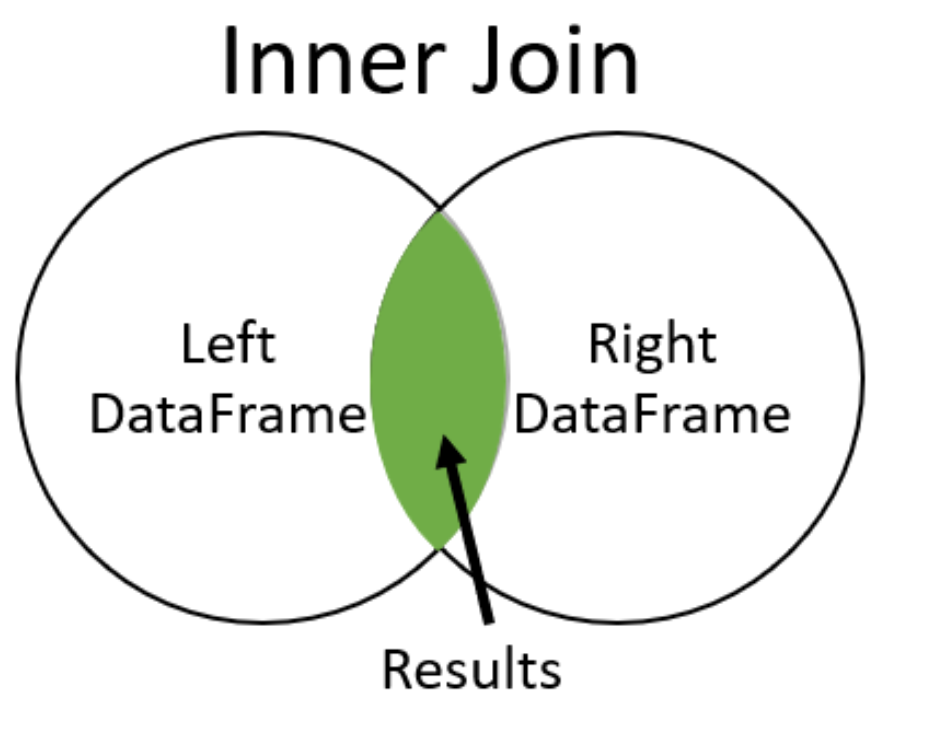

### One to Many Relationship

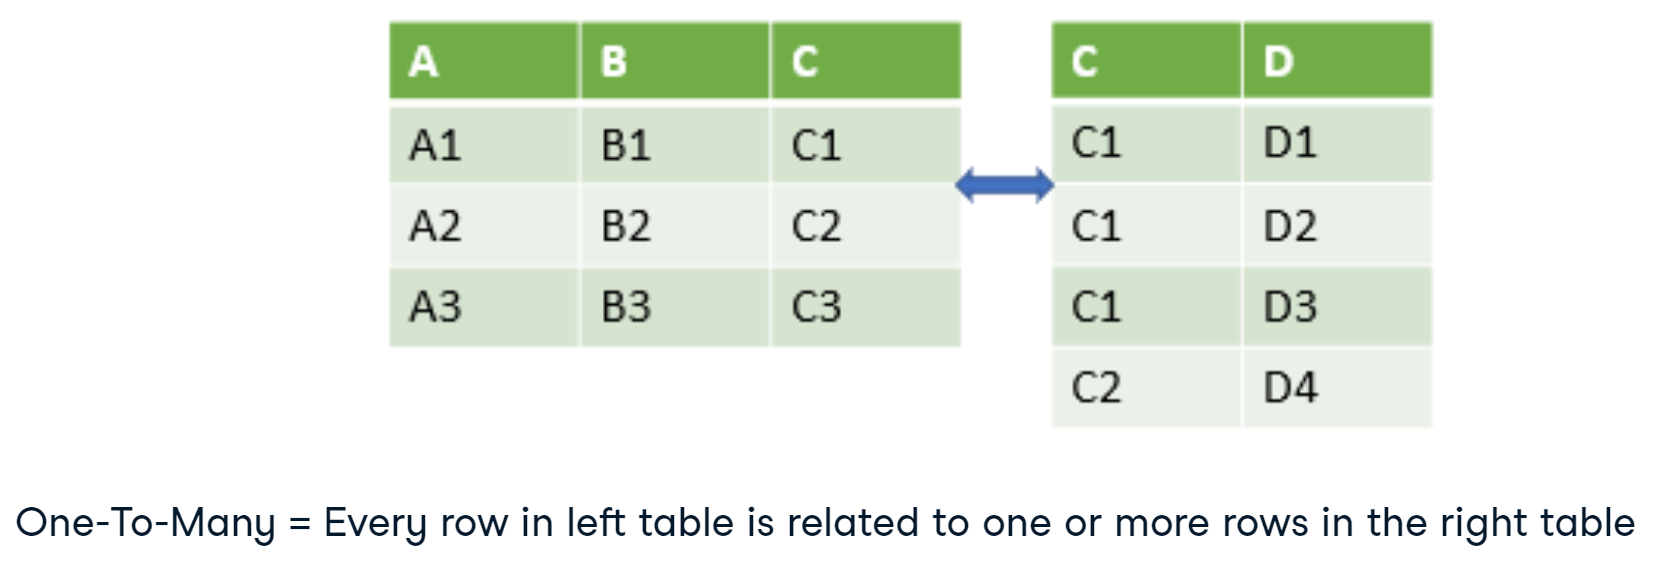

From our End there is no change in syntax. It all depends on the table we are merging with based on the common column.

## Excersize

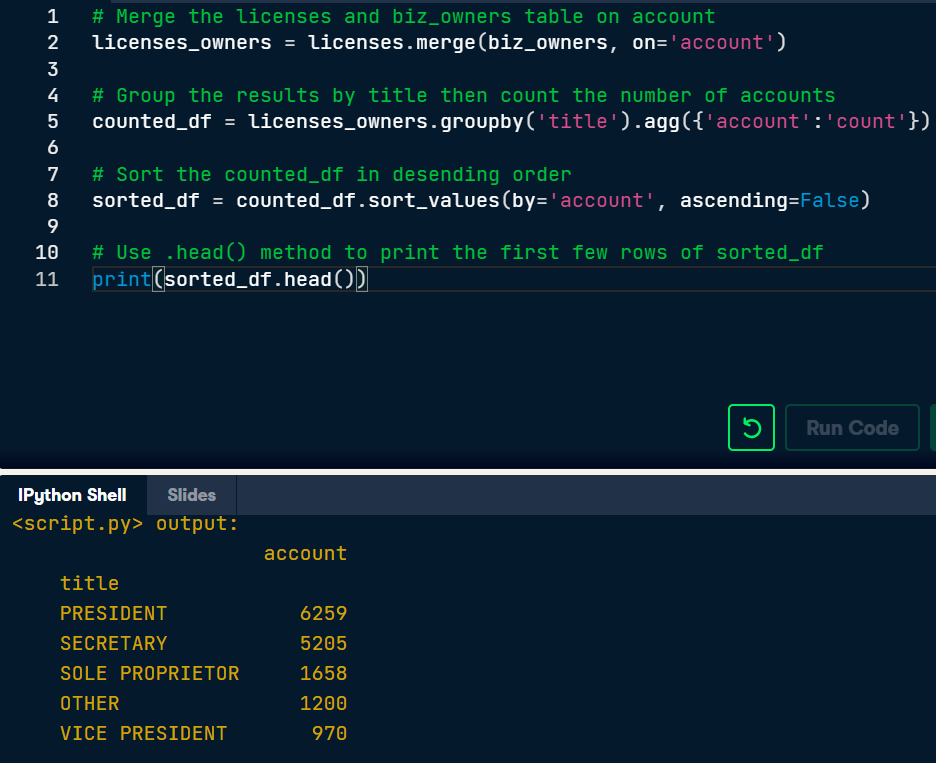

### Merging Multiple DataFrames

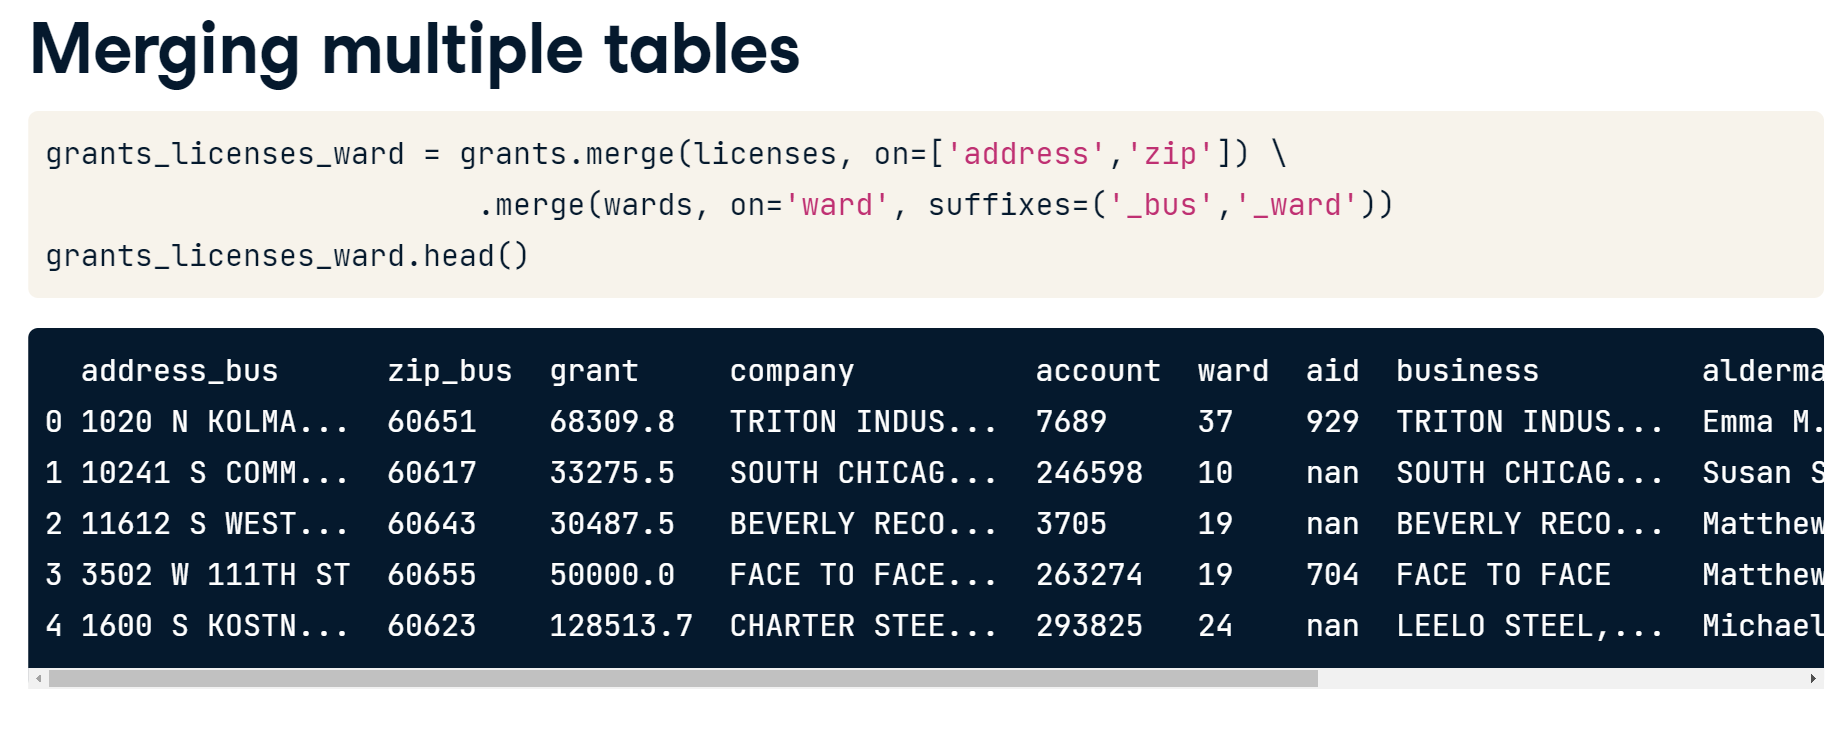

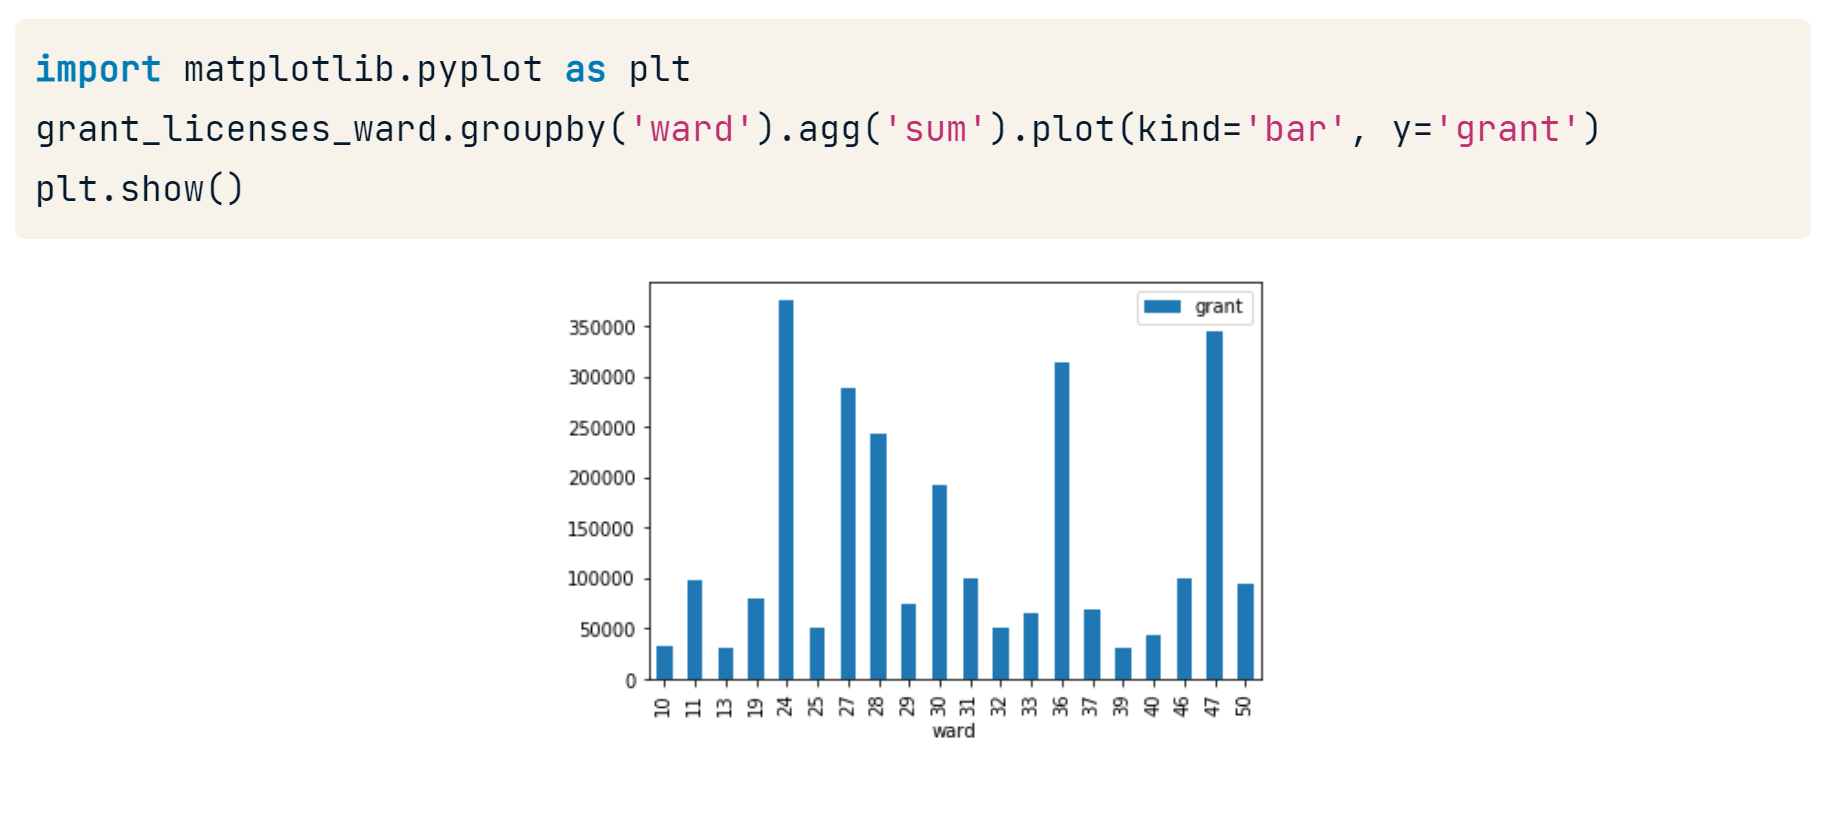


---

# Chapter 2
## Merging Tables with Different Join Types
---
### Left Join

[image.png](attachment:image.png)
<img src=attachment:image.png style="width:40%;margin-left:230px;">

**how = "left"** parameter

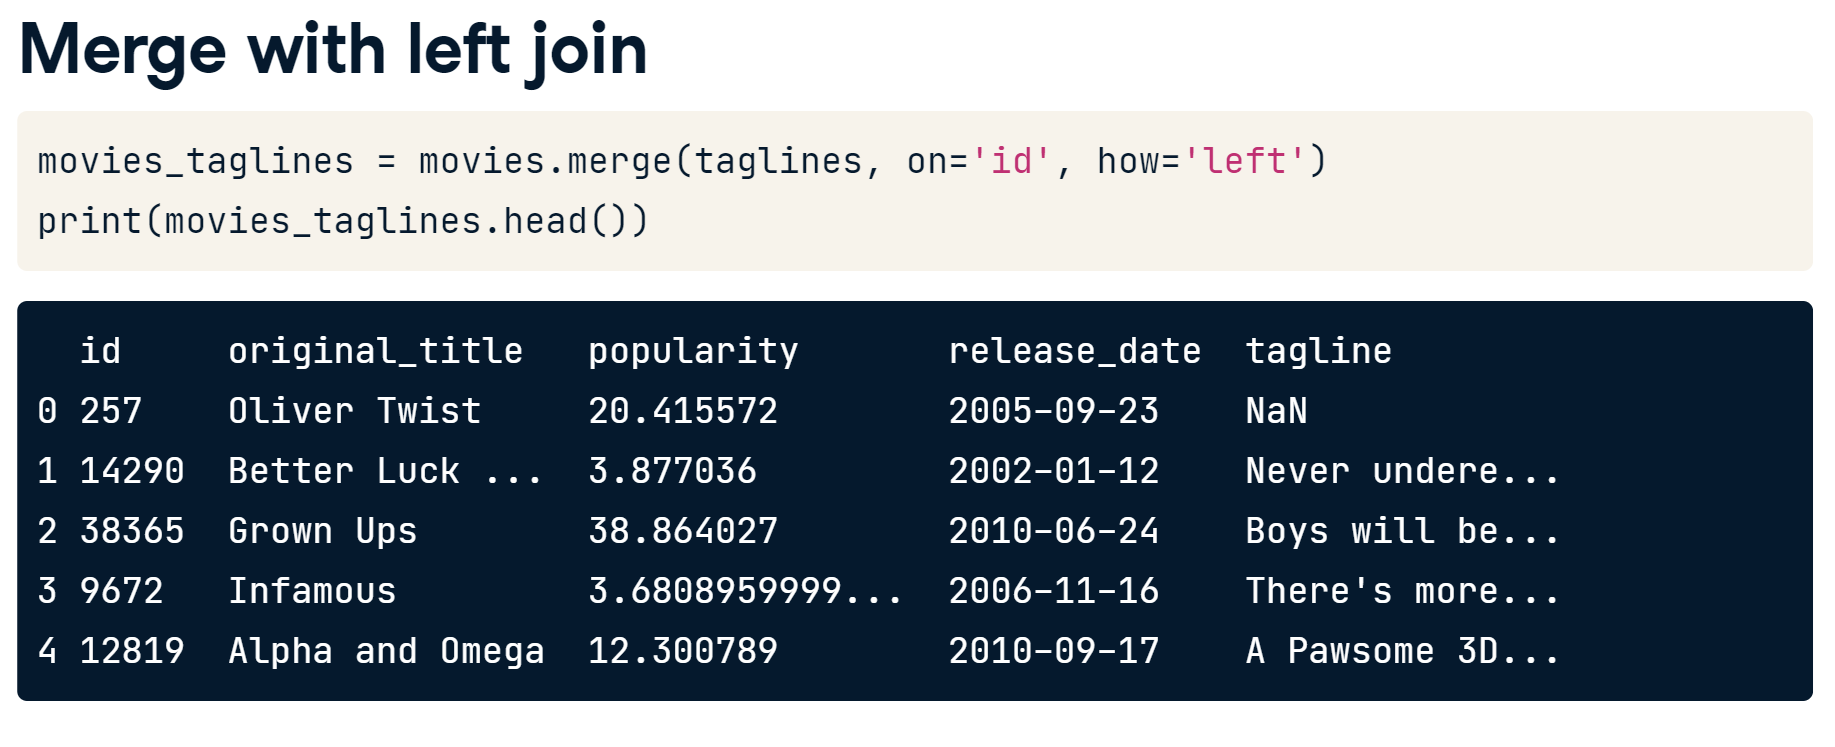


**NOTE**: A left join will return all of the rows from the left table. If those rows in the left table match multiple rows in the right table, then all of those rows will be returned. Therefore, the returned rows must be equal to if not greater than the left table. Knowing what to expect is useful in troubleshooting any suspicious merges.
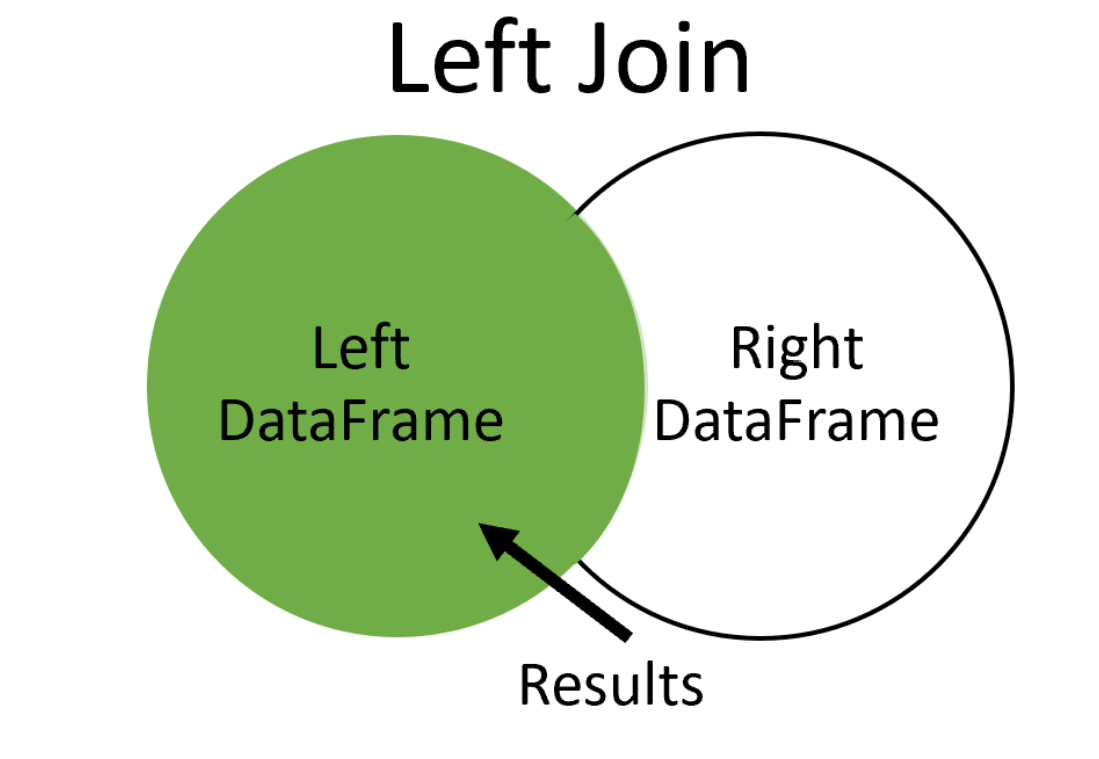

### Right Join

[image.png](attachment:image.png)
<img src=attachment:image.png style="width:40%;margin-left:230px;">

If the column names are different in both the tables, than we can explicitly specify that using `left_on` and `right_on`.

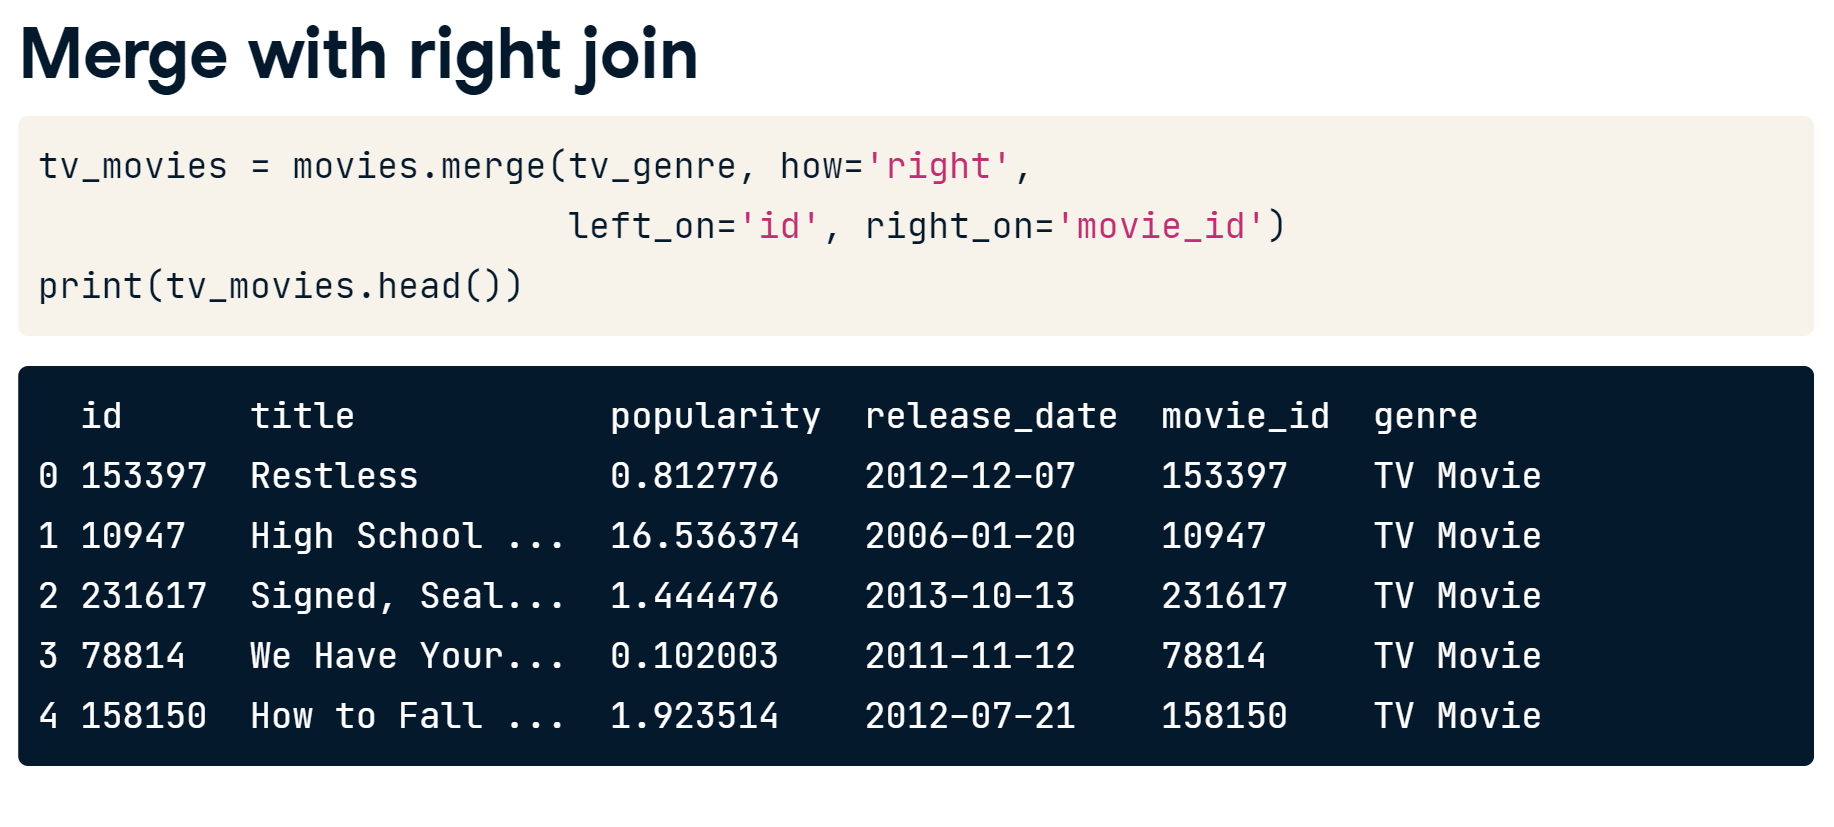
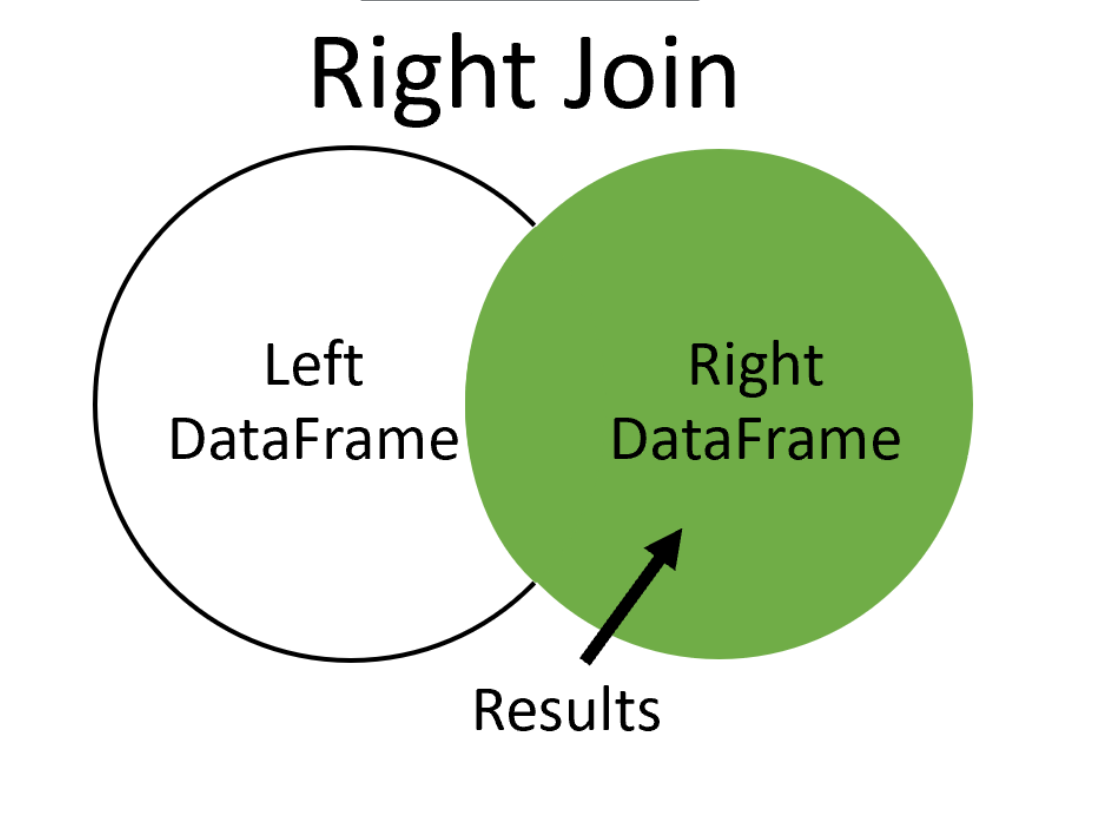

### Outer Join

[image.png](attachment:image.png)
<img src=attachment:image.png style="width:40%;margin-left:230px;">

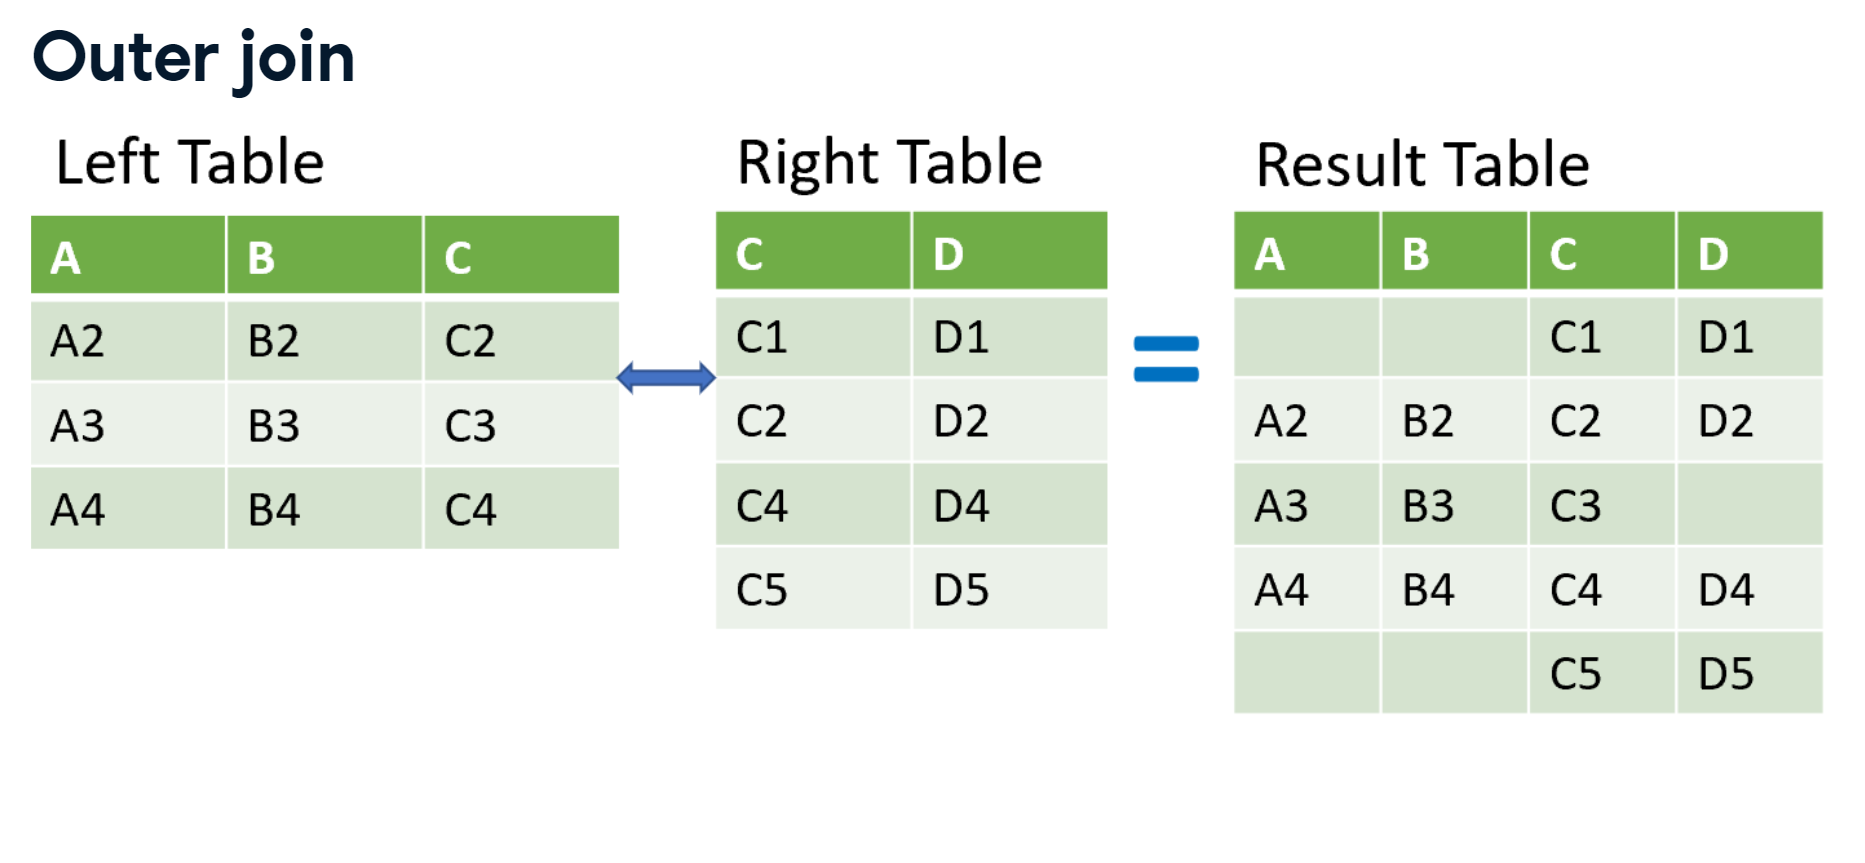

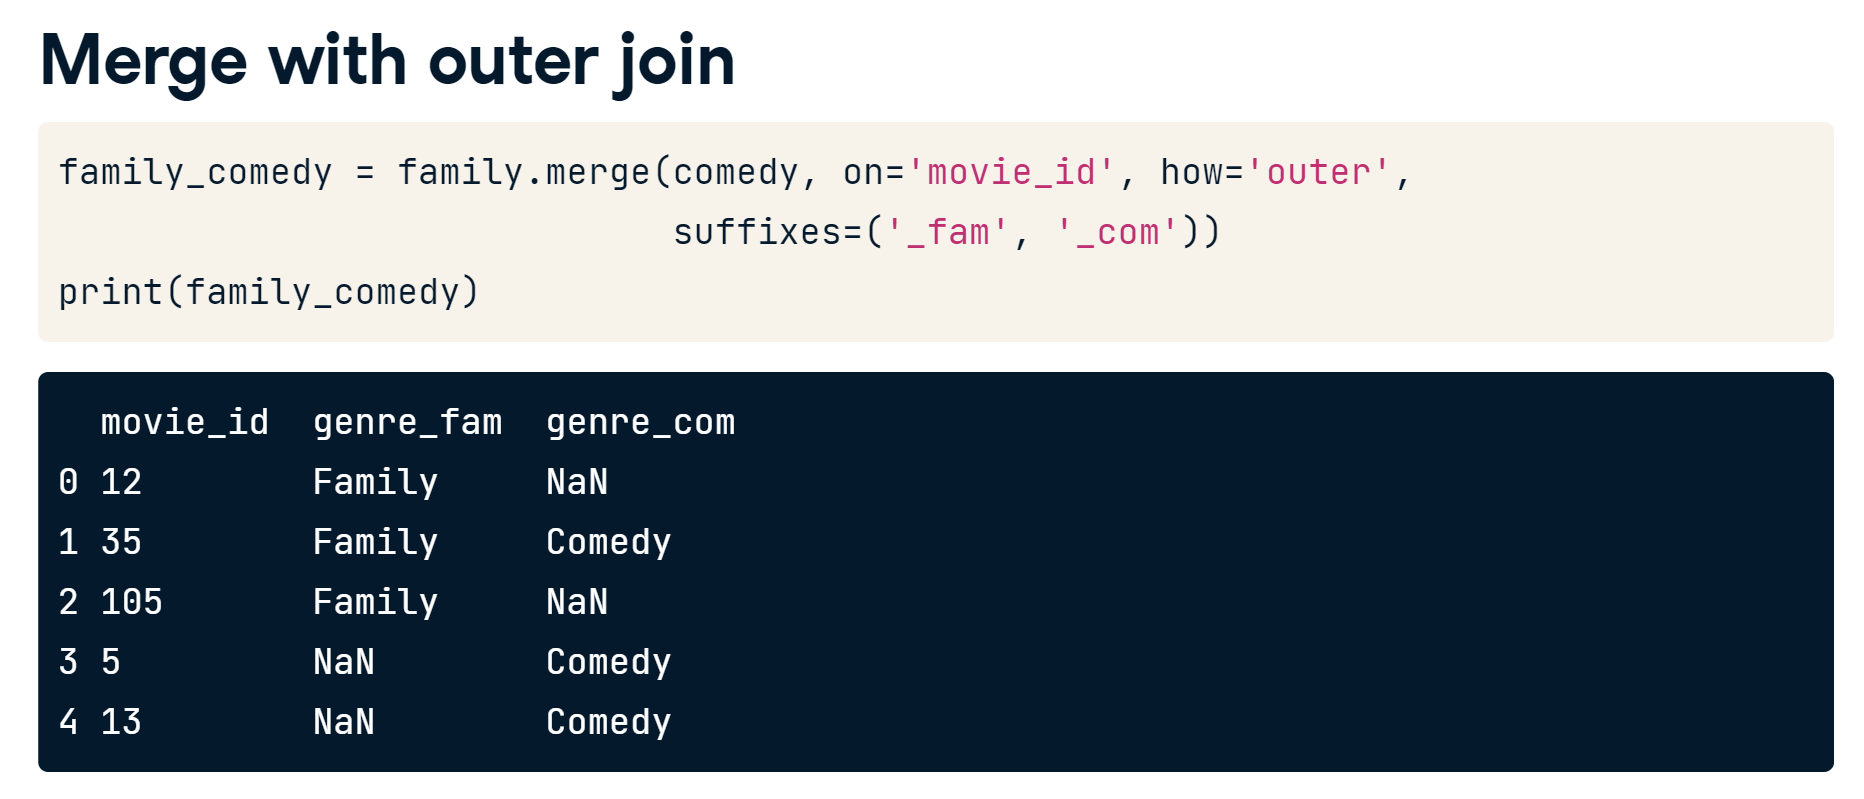
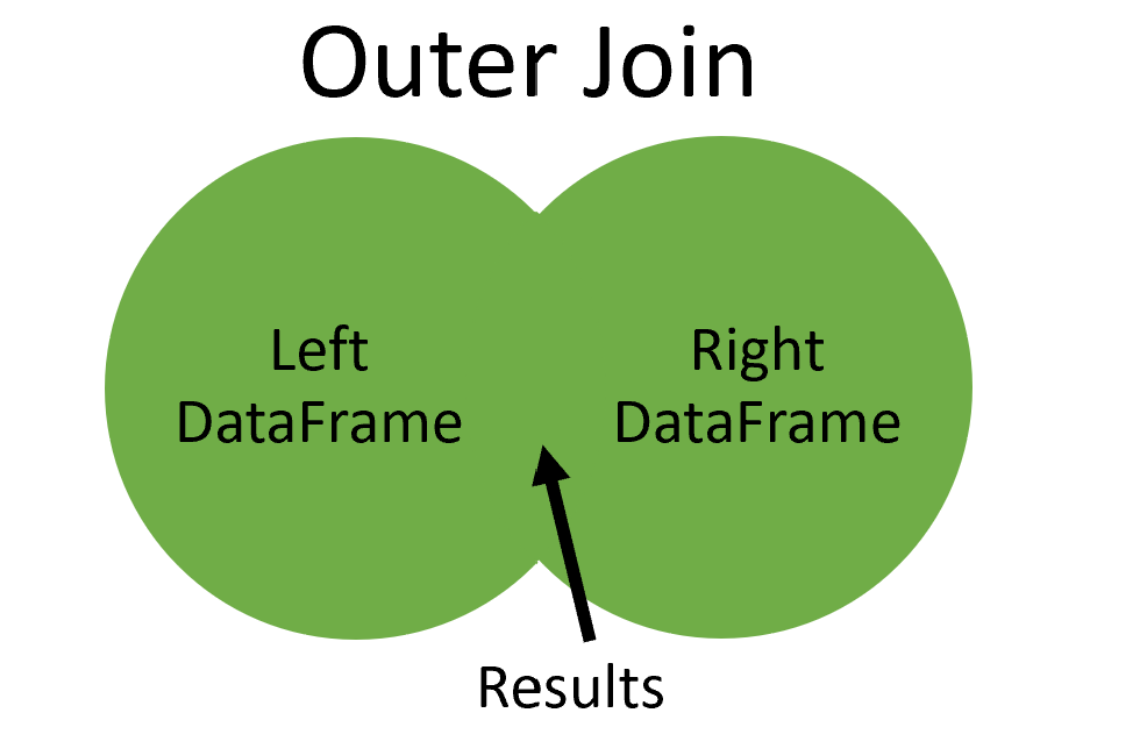

## Merging a Table to Itself:  (SELF JOIN)
---

When will you have to join a table to itself:
1. Graph Data
2. Hierarchial relationships
3. Sequential relationships

**This kind of Merger is By Default, an INNER JOIN**

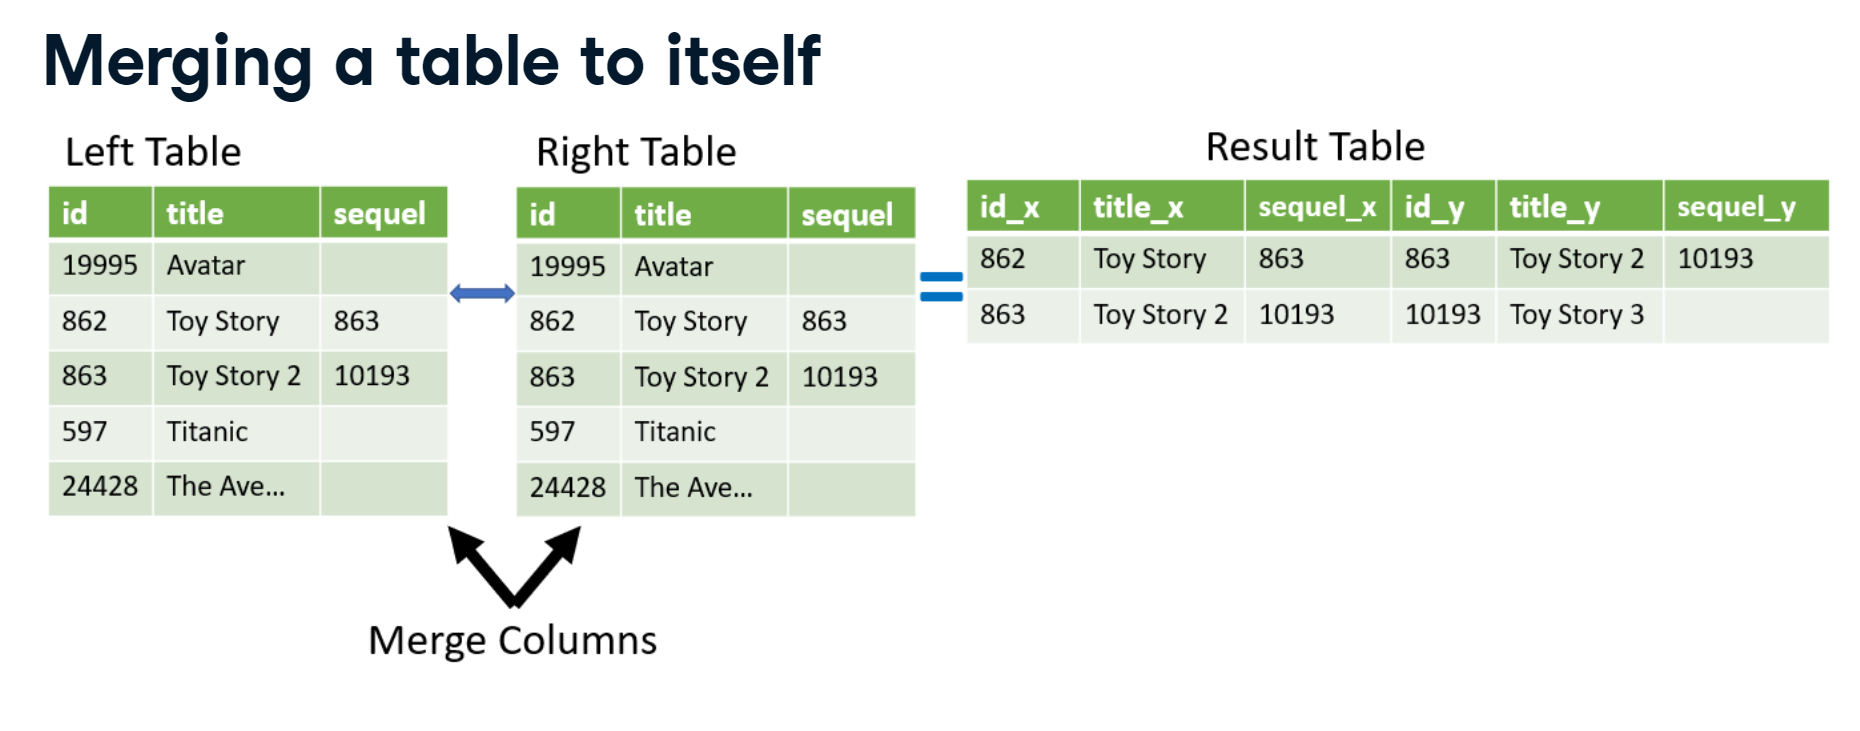

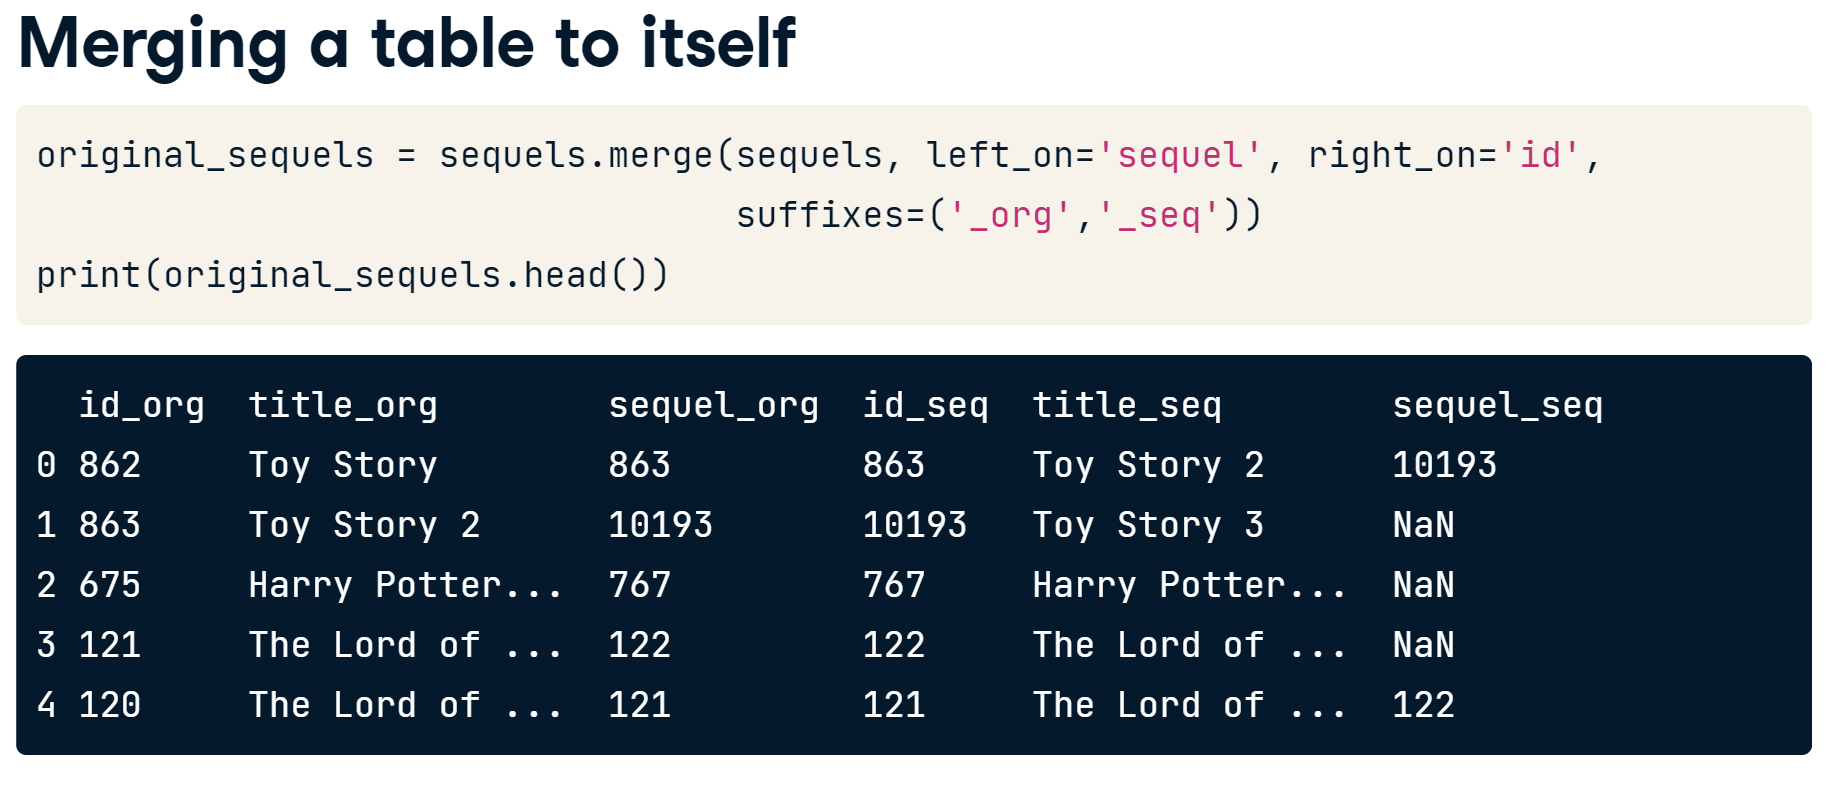

## Merging on Indexes
---

Merging on Index is pretty much the same as merging on column **When** Index is common. Eg:
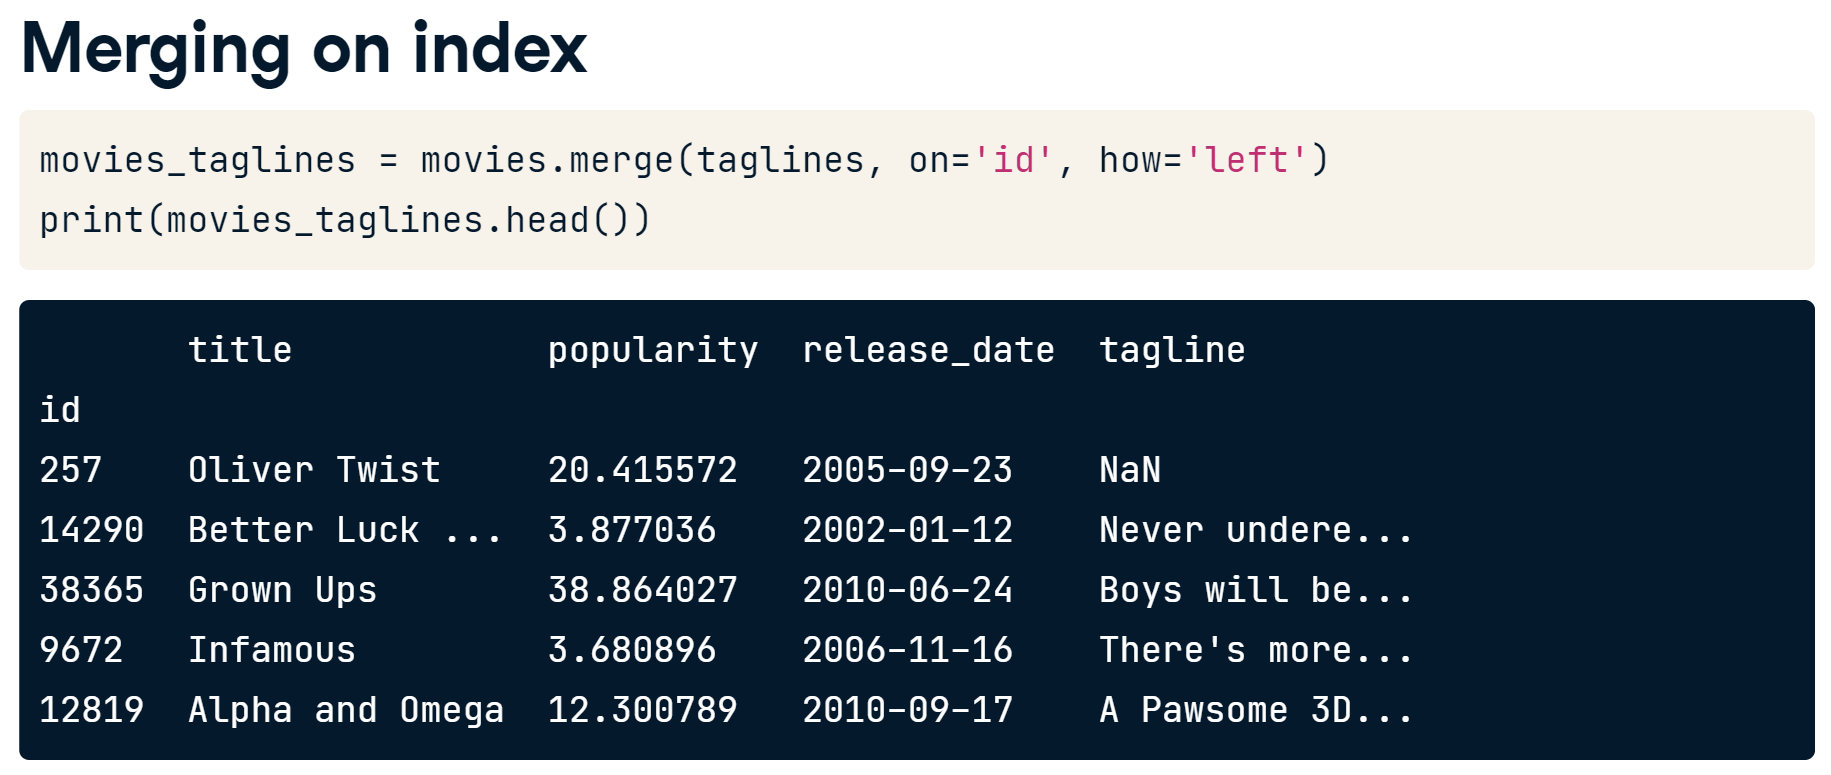

Merging on **Multi index** with same Index name is also, pretty similar, like this:
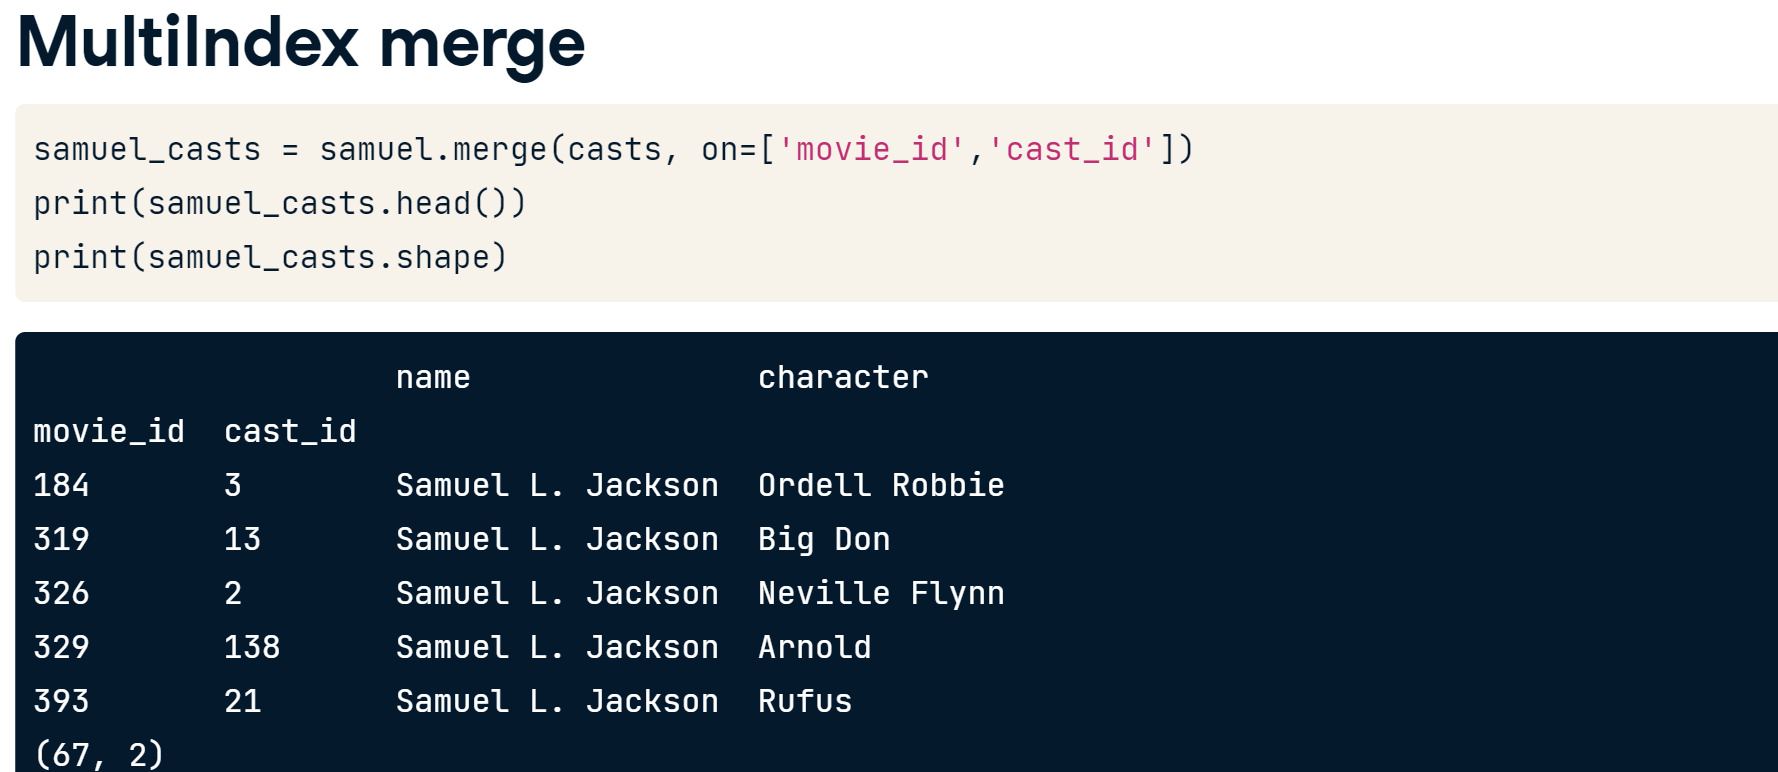

The differnt in Method arises when we are merging on differnt Indexes from both tables, For that we need to mention **left_index=True** and **right_index = True** to get specify the difference in Indexes. Whenever we are using `left_on` or `right_on` argument we need to set the respective `left_index` or `right_index` to **True**

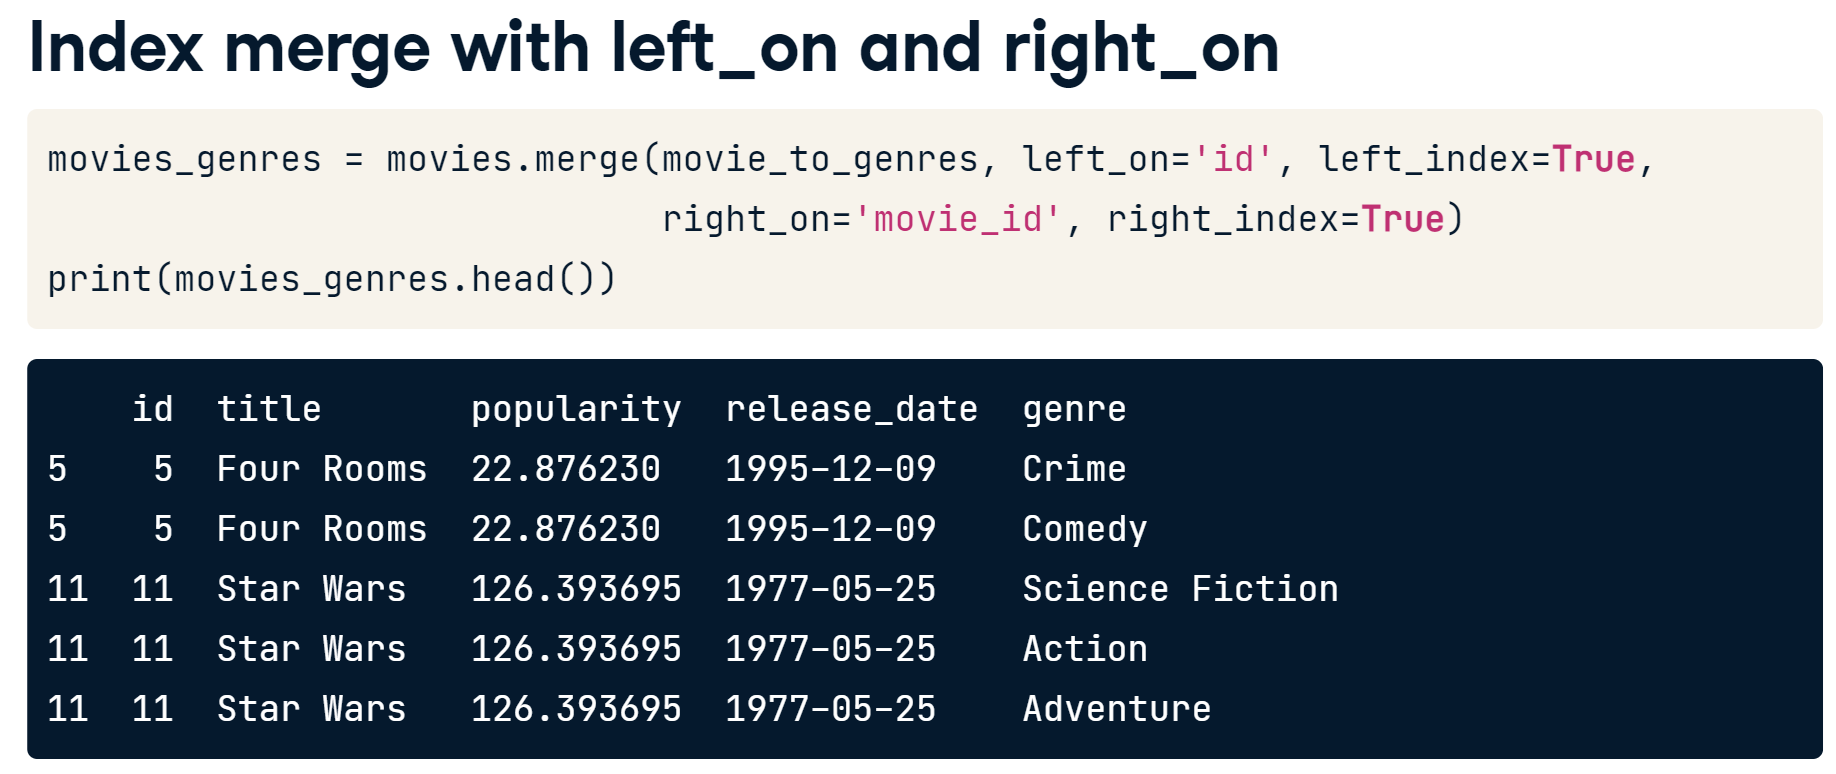


## USE CASE (Examples)
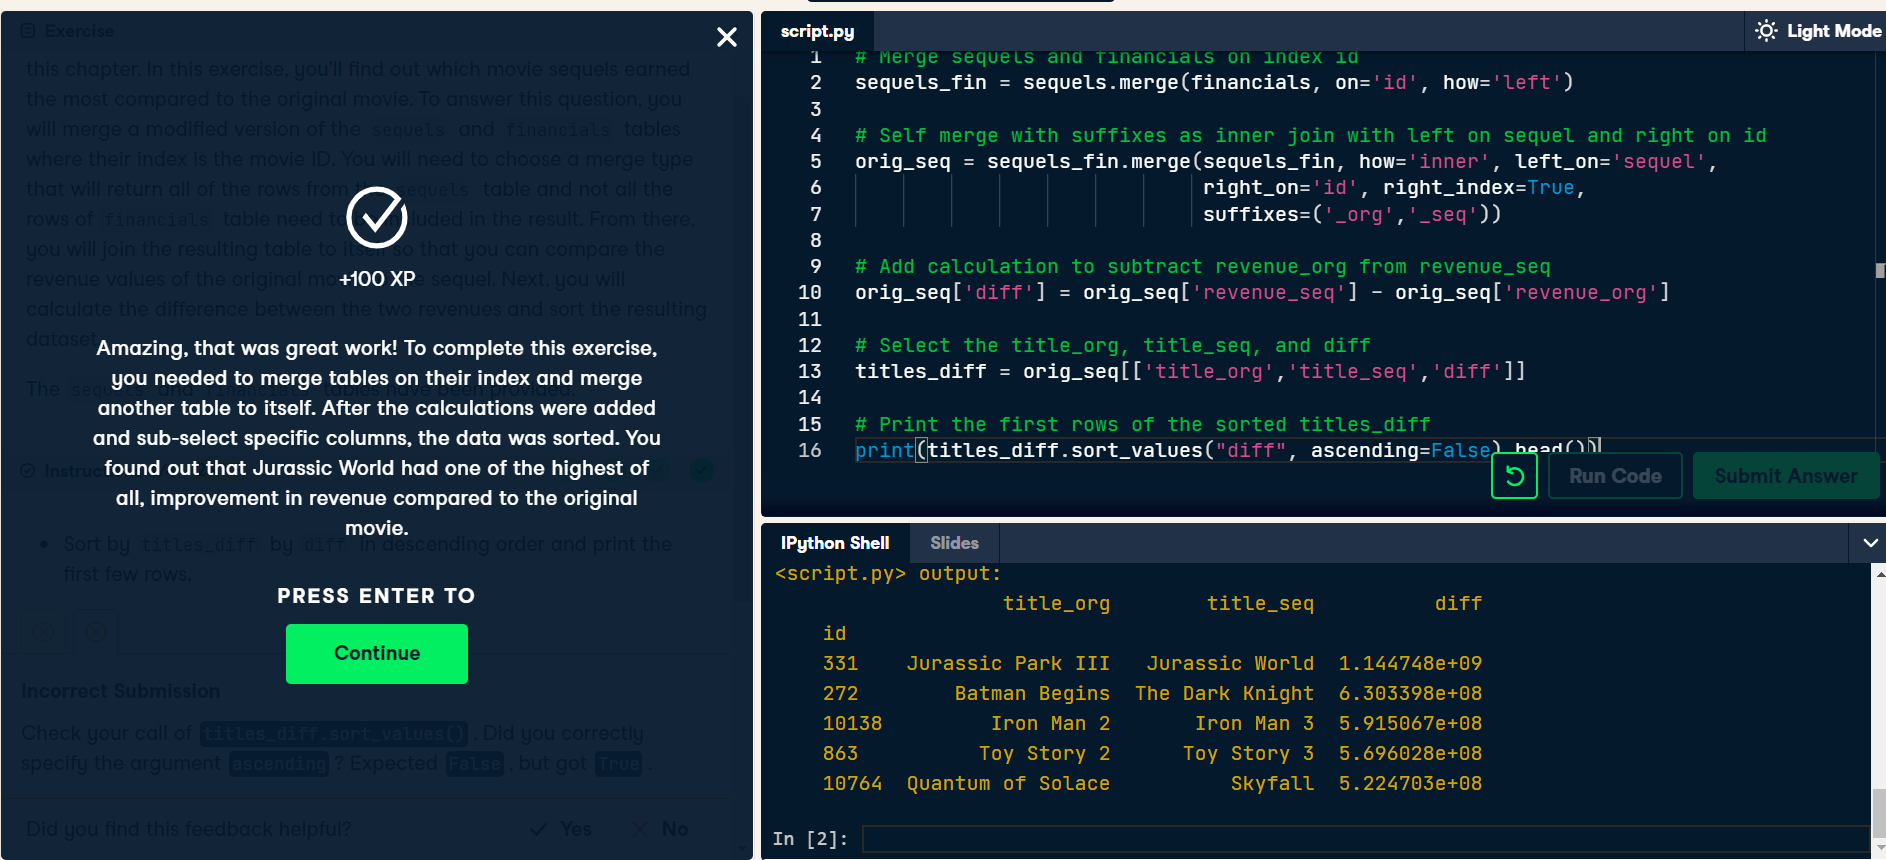

# Chapter 3
## Advanced Merging and Concatenation
---

Fist we gotta look at the difference between **Mutating Versus filtering** Join

#### Mutating Joins:
* Combine data from two tables based on matching observations in both tables

#### Filtering Joins:
* Filter observations from table based on whether or not they match an observation in another table.

But before this, let's see what is **Semi-join** ?
So, In semi-join, the right table is filtered according to matching values from left table. Similar to INNER JOIN, but unlike that only columns of left table are shown. Like this: 

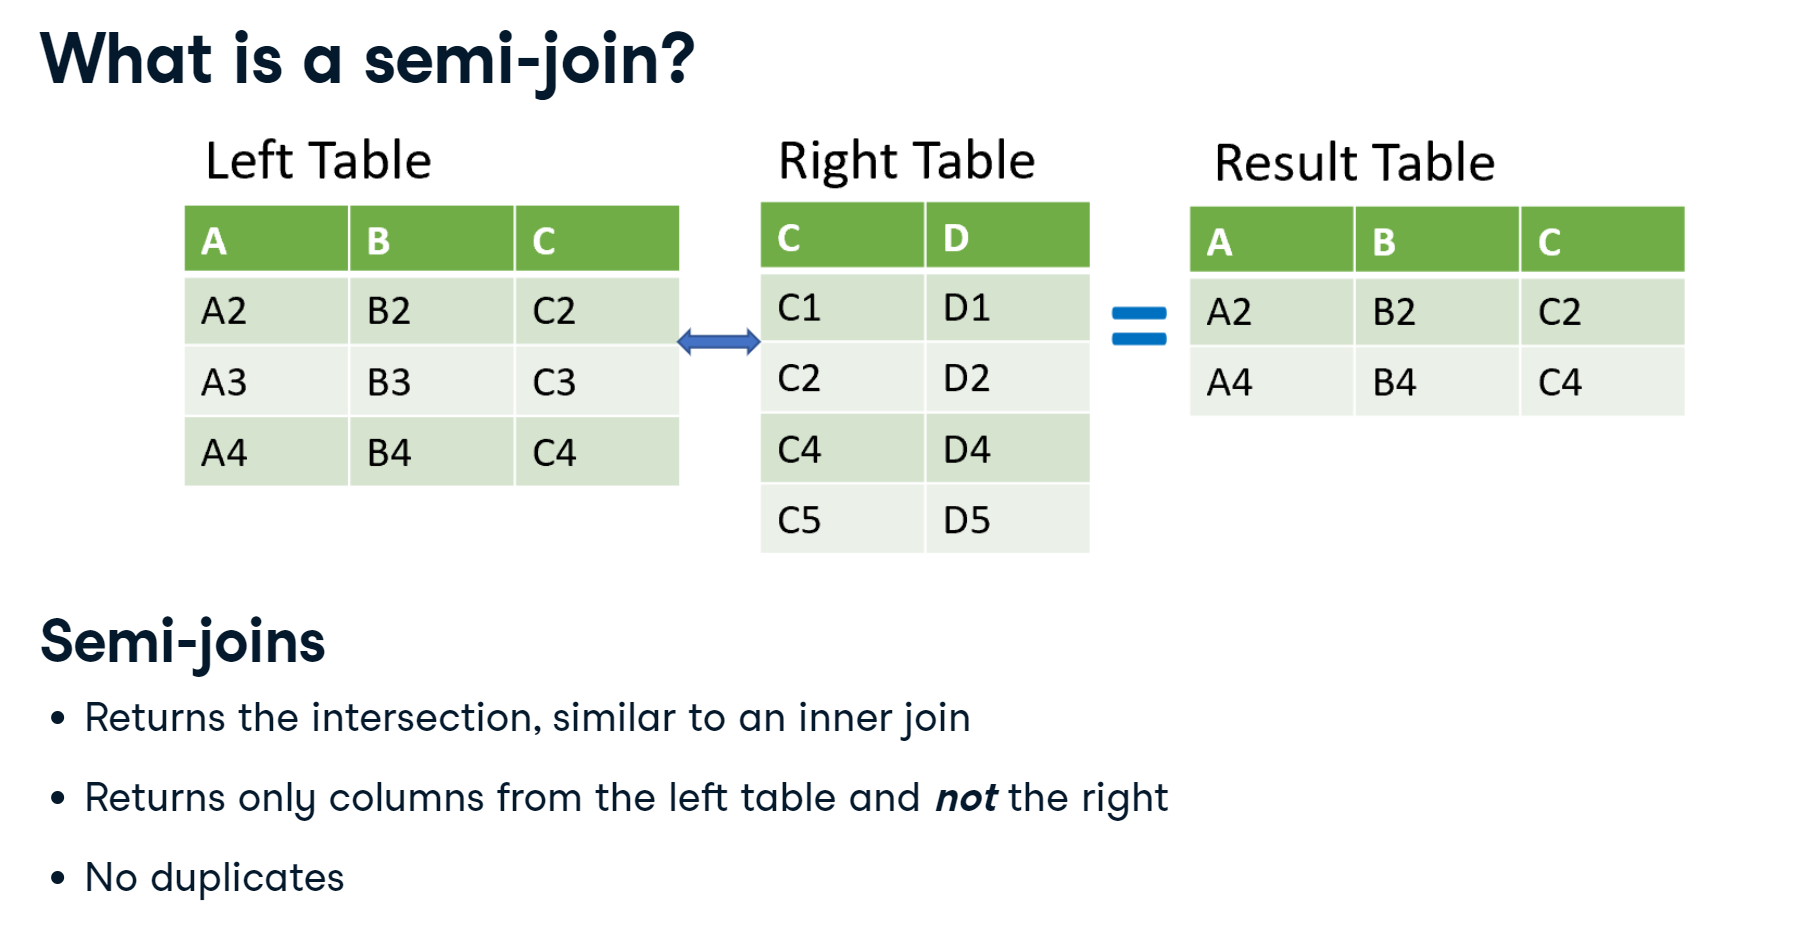

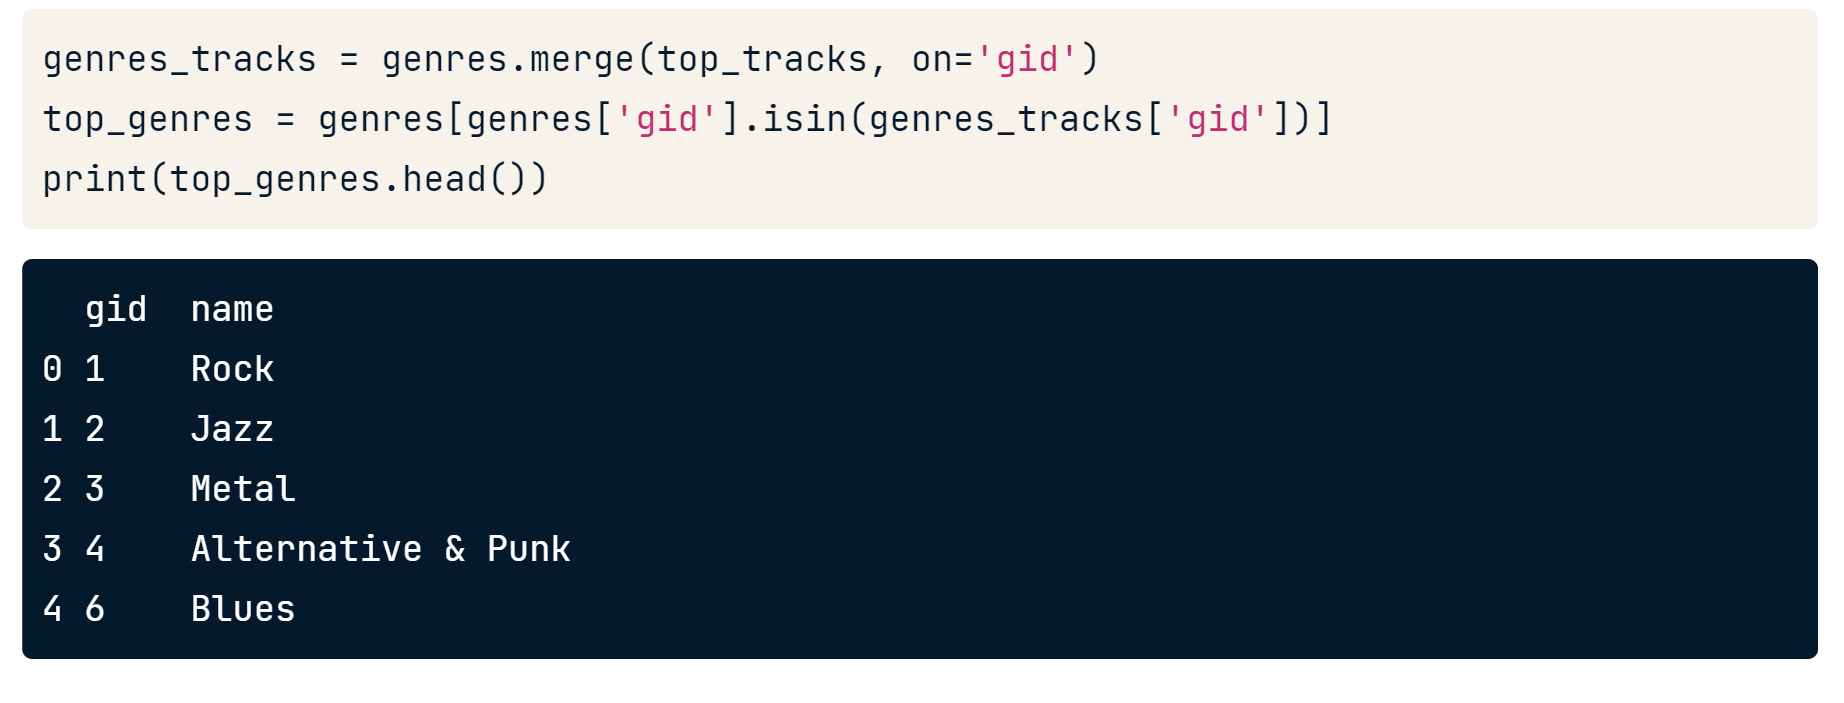

---
Opposite to Semi-Join, Anti-Join excludes the intersection.

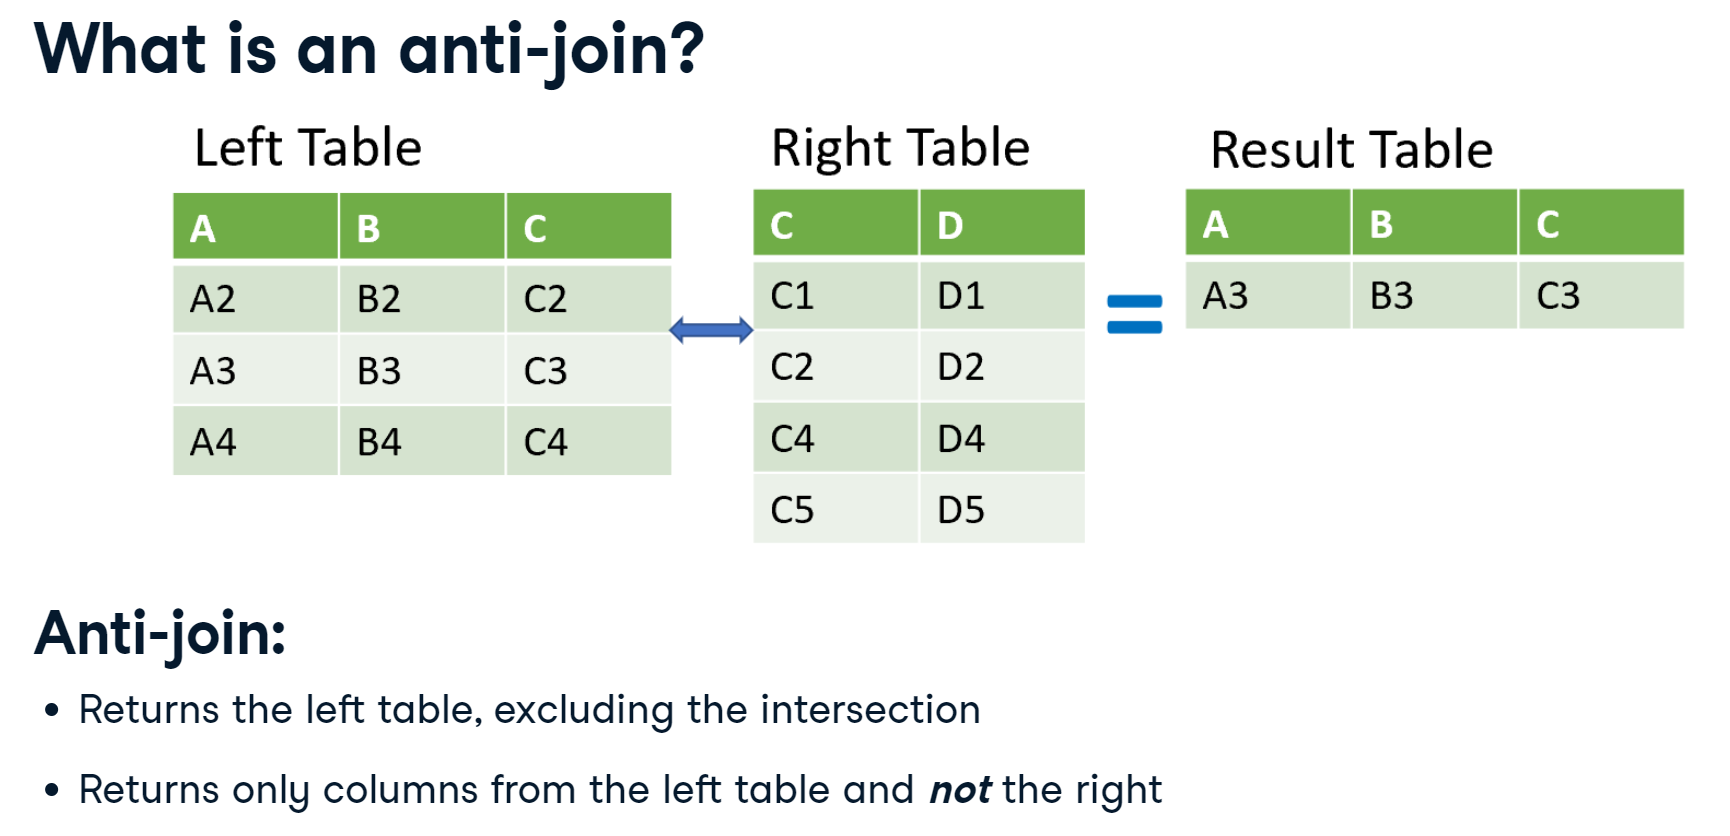

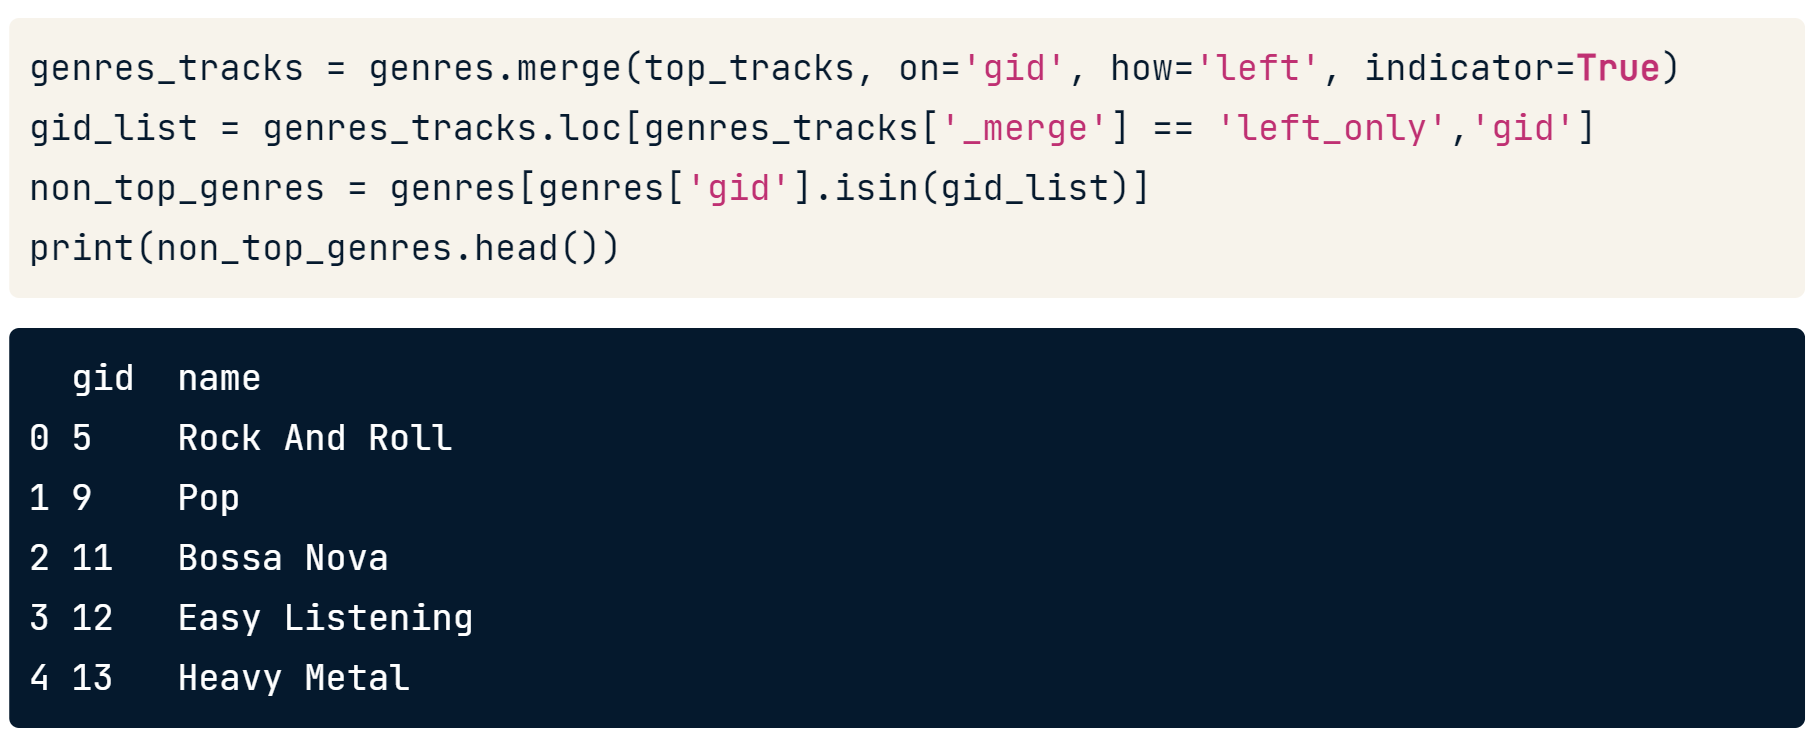

## Concatenate DataFrames together vertically

`.concat()`, They are combined in the order the names they are passed in. The result is a vertically combined tables.
If the index contains no valuable information than we can simply ignore the index by `ignore_index=True`.

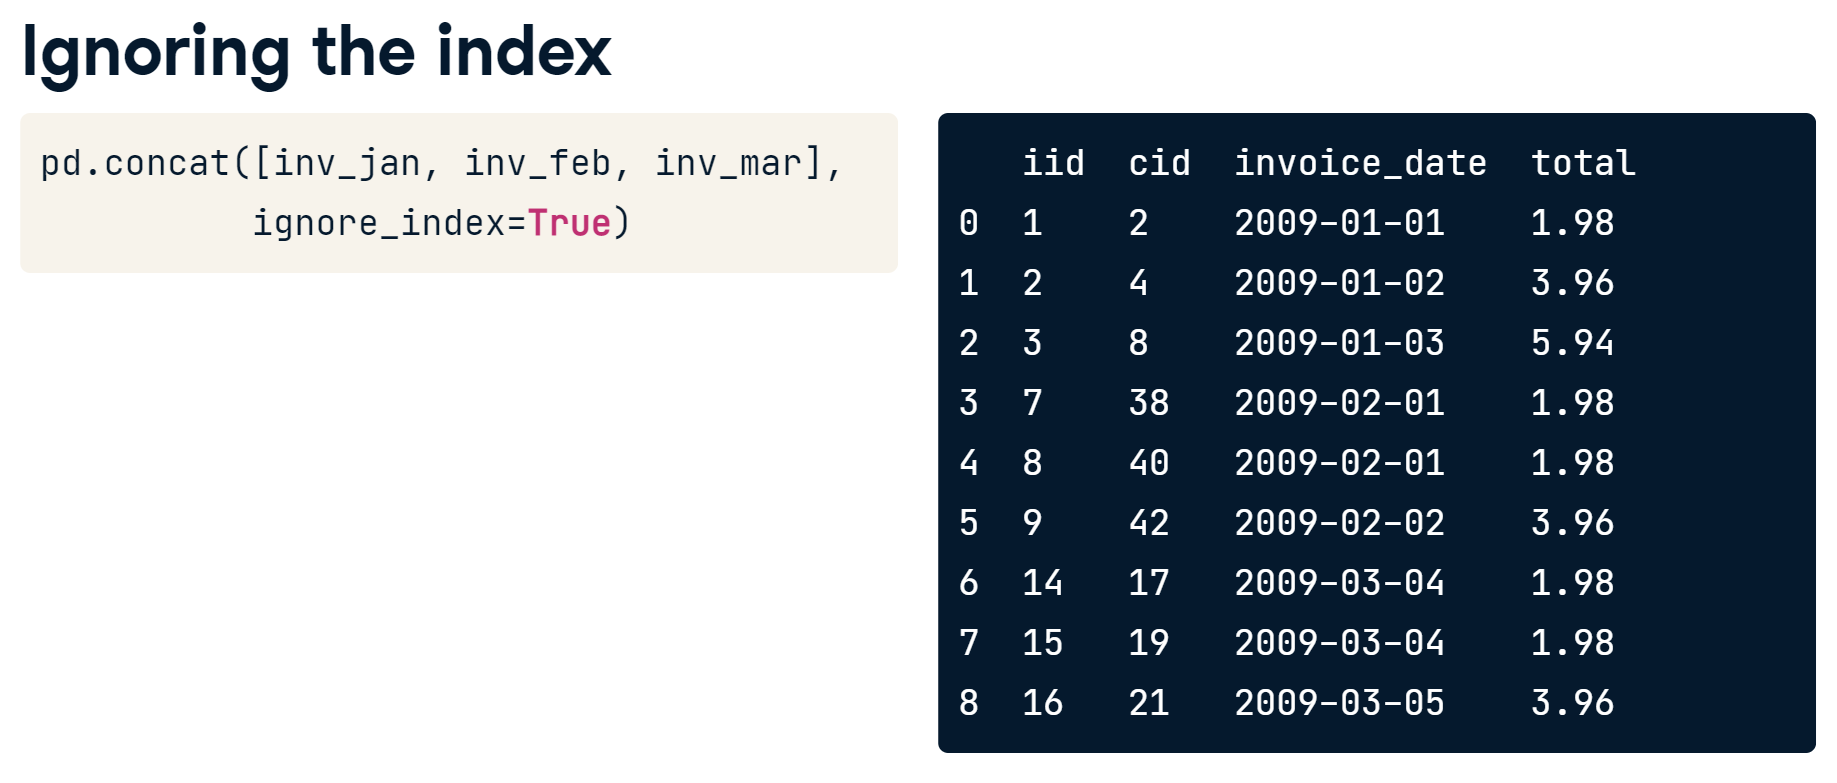

**NOTE: Providing keys and ignoring index can NOT be done simultaneously**

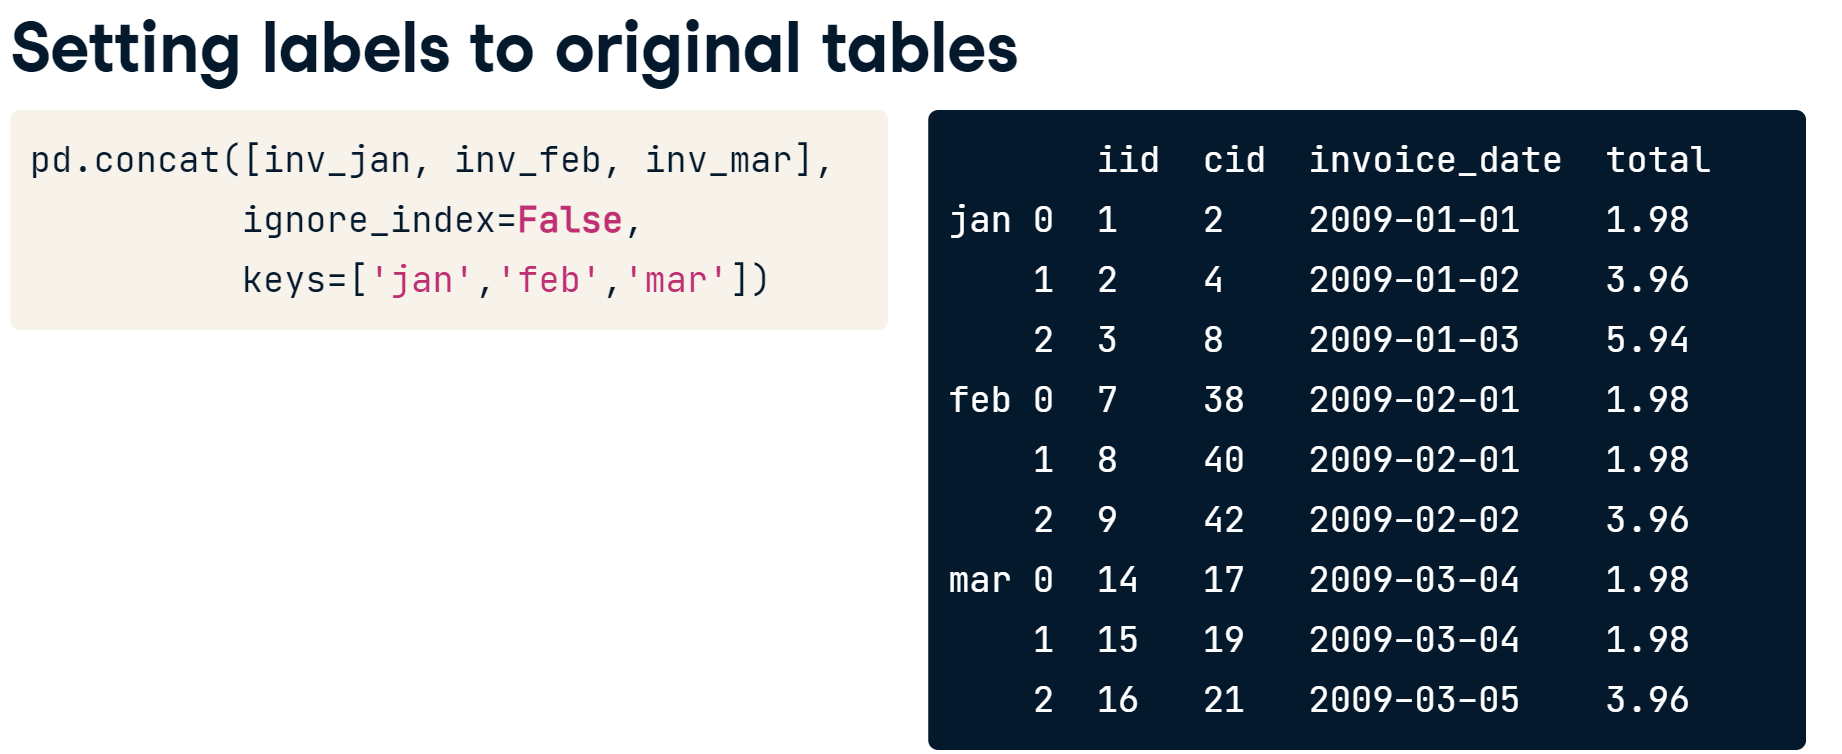

`sort = True` argument is used to sort the column names in the combined table<br>
`join='inner'` argument is used to select only the common columns between the tables, and sort doesn't work with it.

`.append()` :
* Simplified version of `.concat()` method
* Supports: `ignore_index`, and `sort`
* Does Not Support: `keys` and `join`
    * Always `join = outer`

---
### Verifying Integrity

There are very possible chances to get unintended duplicates, one-to-many, or many-to-many relationships between concatenated tables. So we need to verify our Data integrity.

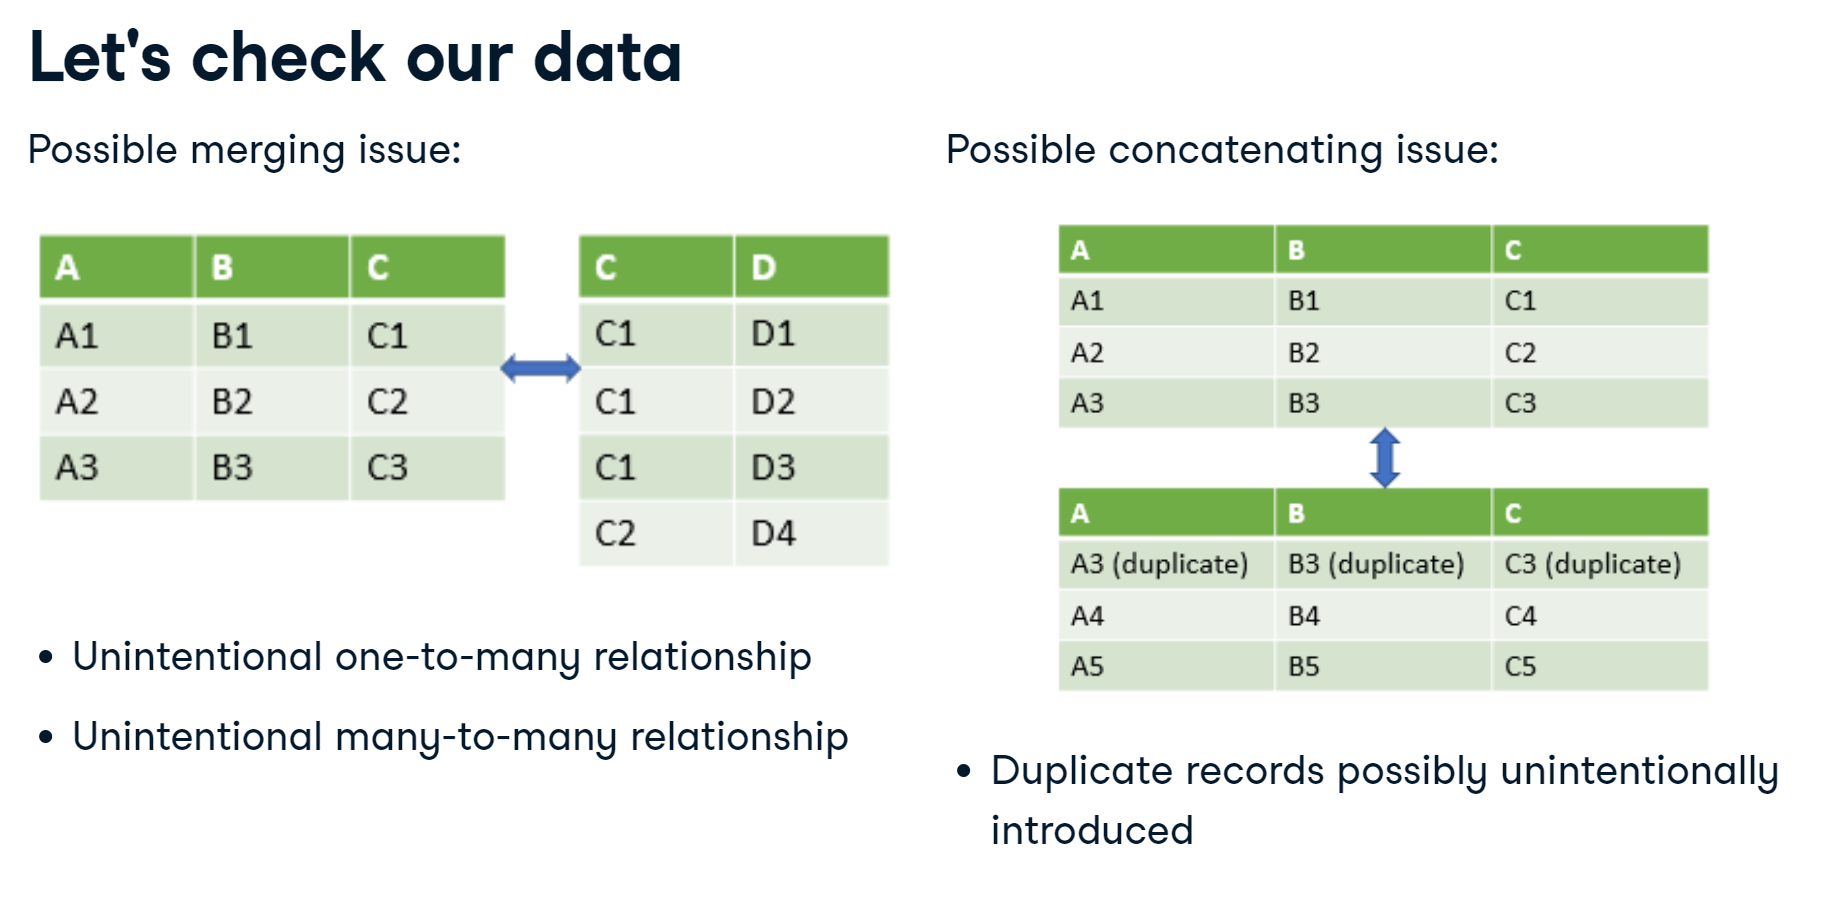

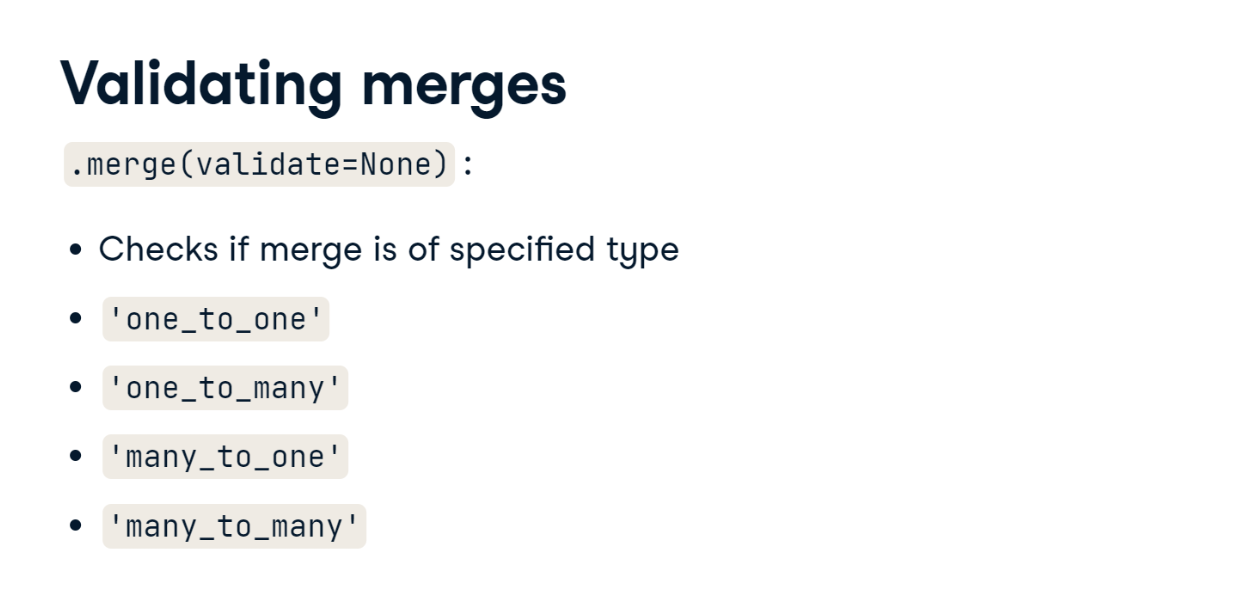

If the merge is not of specific type, then its gonna throw an **ERROR**

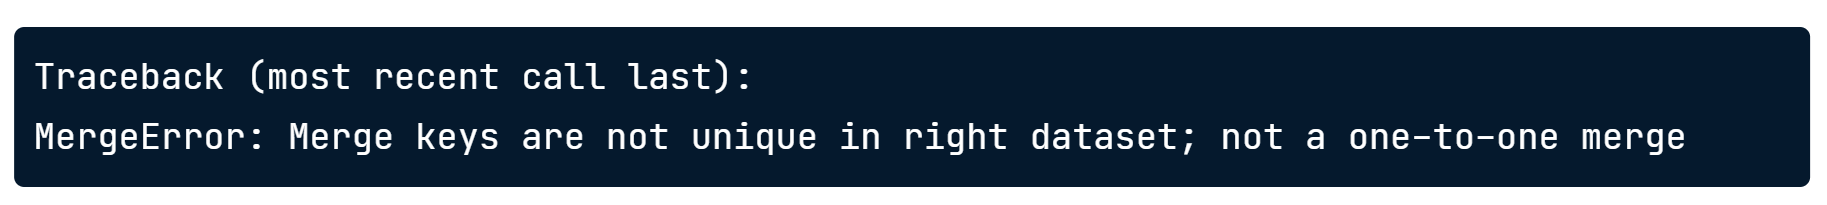

For concatenation, it checks **only Index values for duplicates** not column values, checks with `verify_integrity = True`

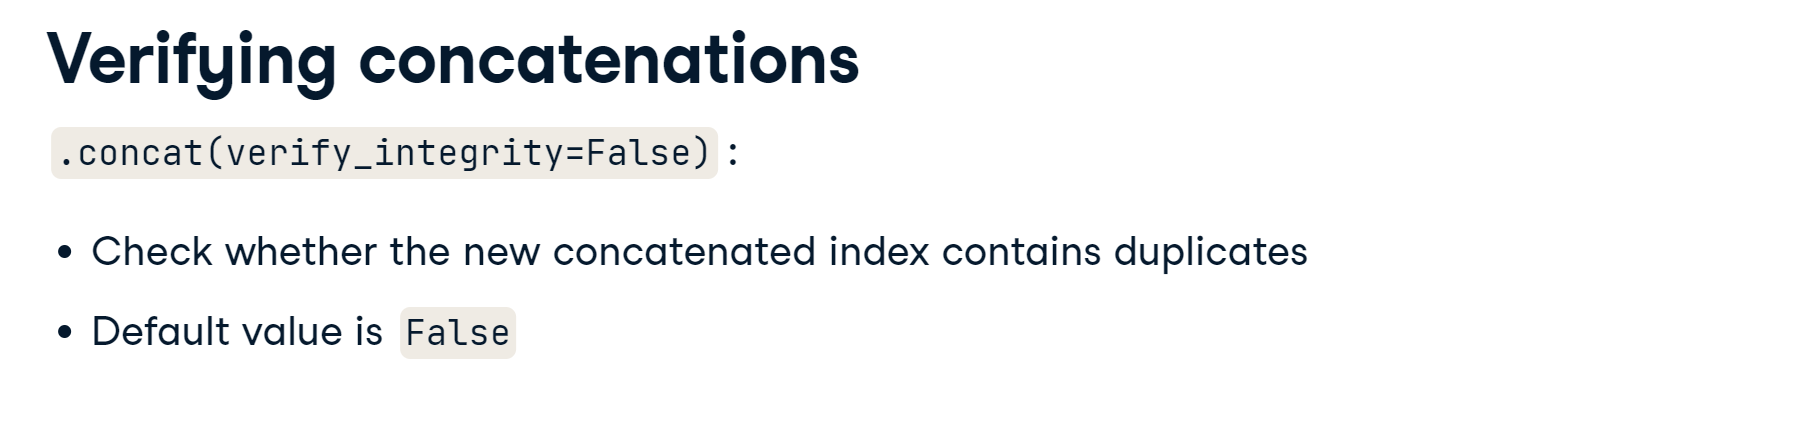



---
# Chapter 4
---

## merge_ordered()

This method can merge time-series or other ordered data. **Give sorted result**

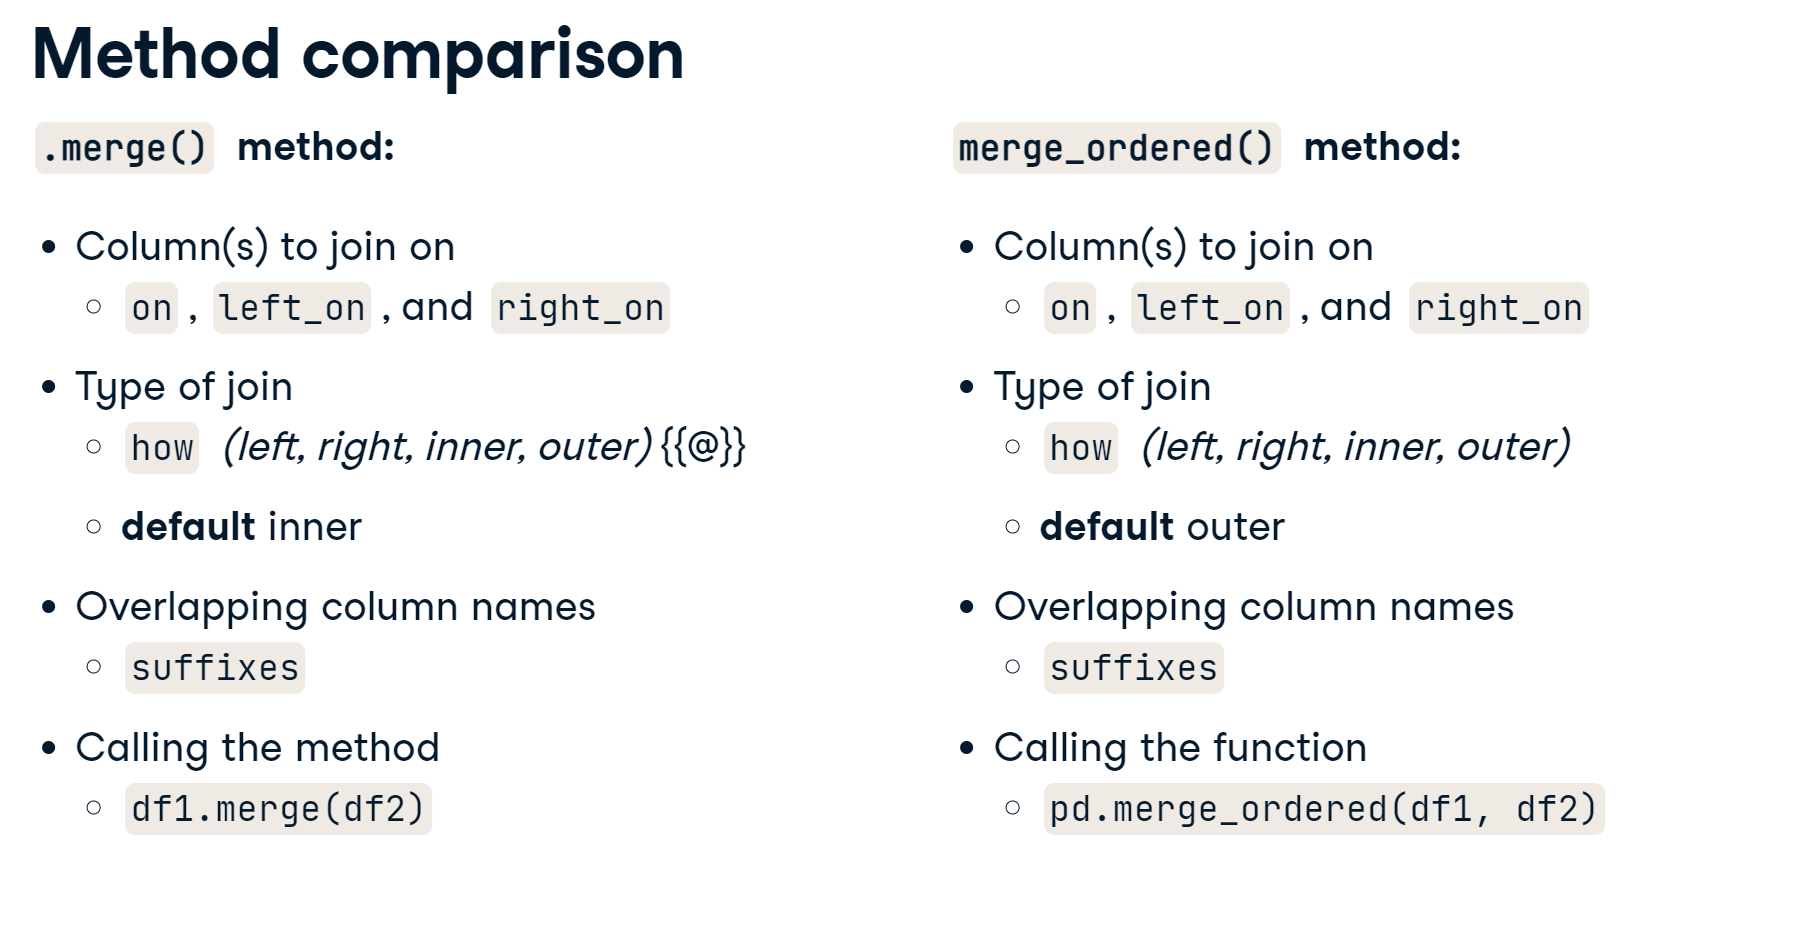

### Merging 2 tables and then Forward Filling the missing values:

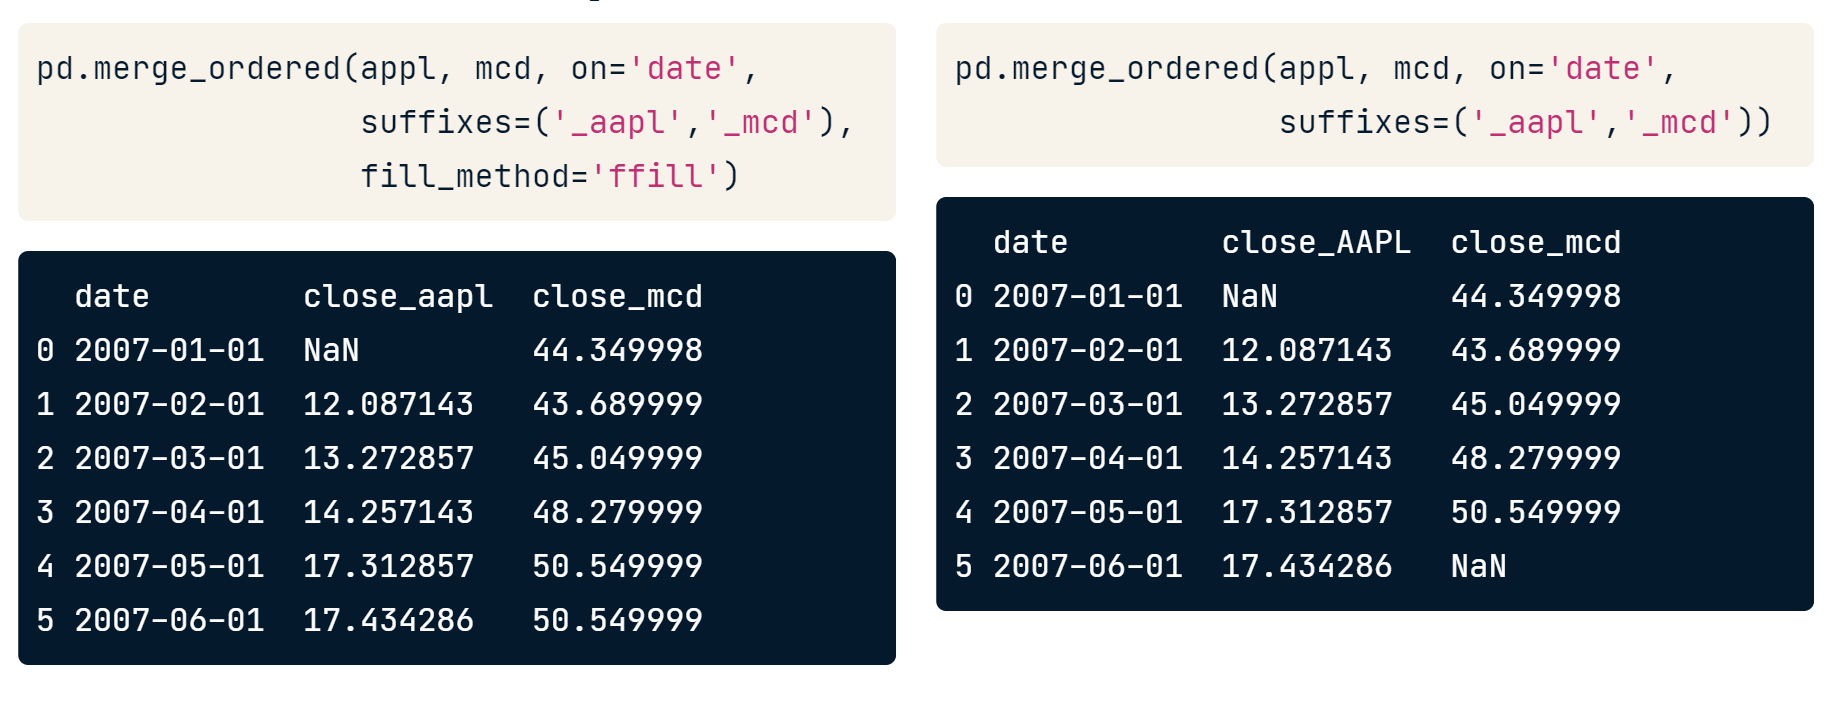

### When to Use:
* Dealing with Ordered data/ time series
* Filling in missing values

**Keep Note: When we are choosing the columns to merge on, it is important to chose the order of those columns wisely, as according to that the resultant values will change their order.**

---
## merge_asof()

Another method for ordered or time series data. It is similar to *ordered left join*,<br>
**However, the match doesn't need to be an exact match, nearby value is considered as well**<br>
**NOTE: Merged 'on' columns must be sorted !!**

DEFAULT VALUE ==> `direction = 'backward'`, but we can change this to: `direction = 'forward'`, this direction argument is used to determine which nearby value to pick, less than or greater than respectively.
One more value that we can set to *direction* is `direction = 'nearest'`, this will chose the nearest irrespective of forward or backward.

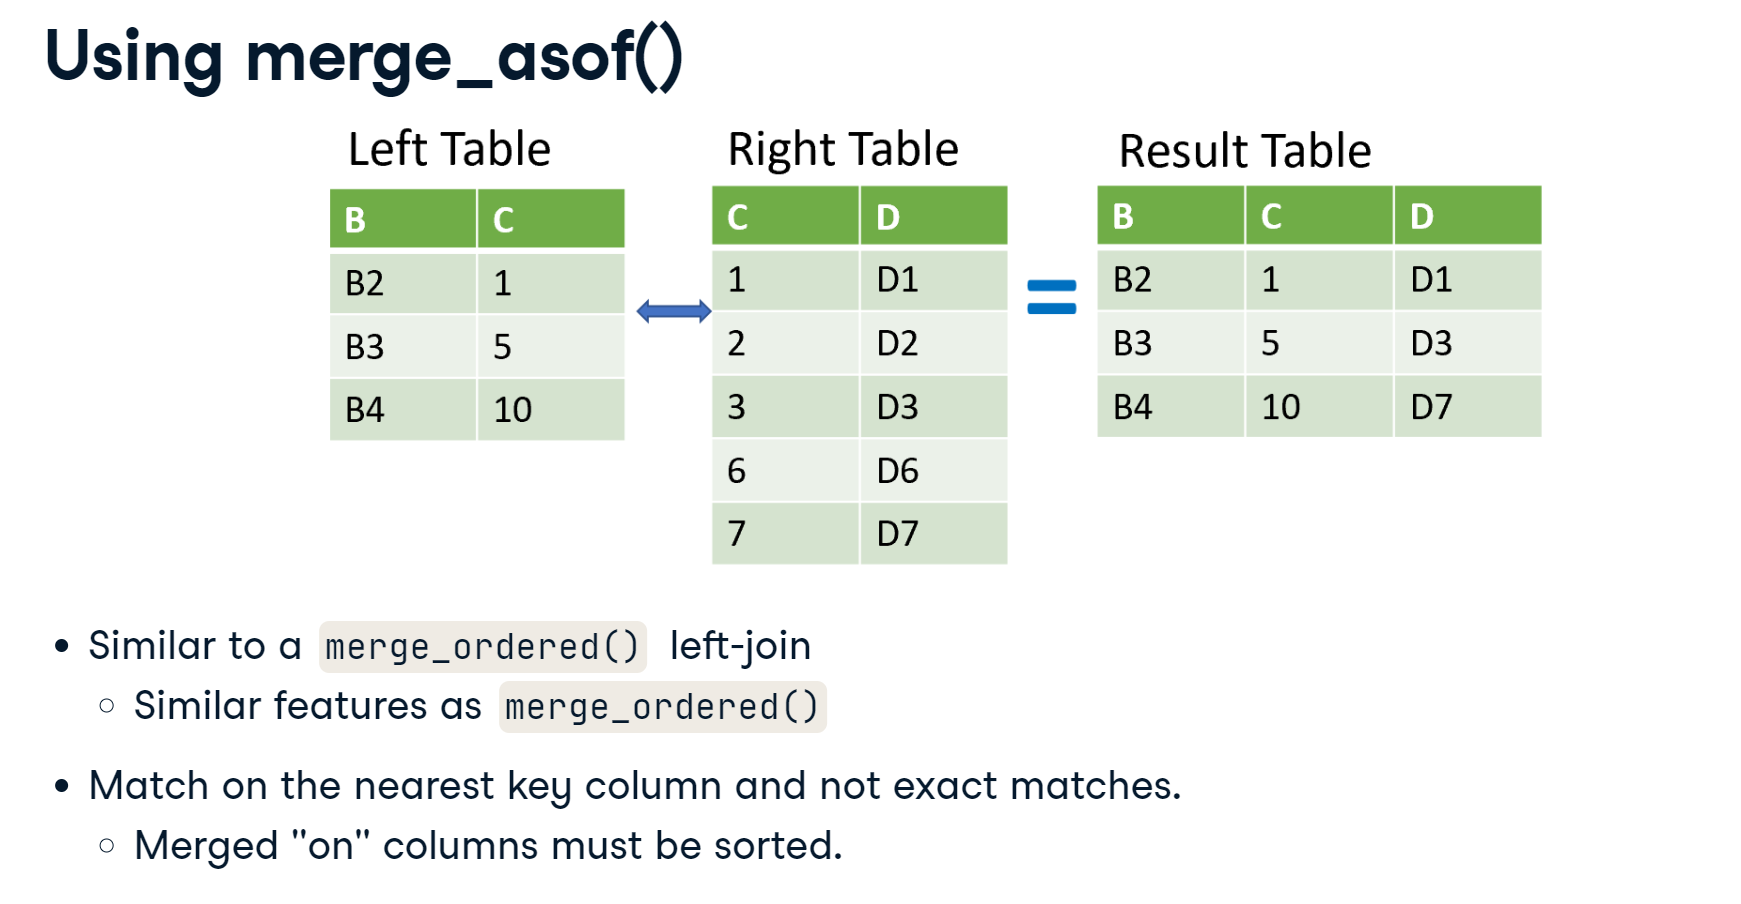

### When to Use:
* Working with Data sampled from a process, where the data is not exactly aligned
* Wokring on training set,(no data leakage) ==> when you do not want values from the future to be visible at any point of time.

### Using merge_asof() to create dataset
The `merge_asof()` function can be used to `create datasets` where you have a table of start and stop dates, and you want to use them to create a `flag` in another table.

**Example:**

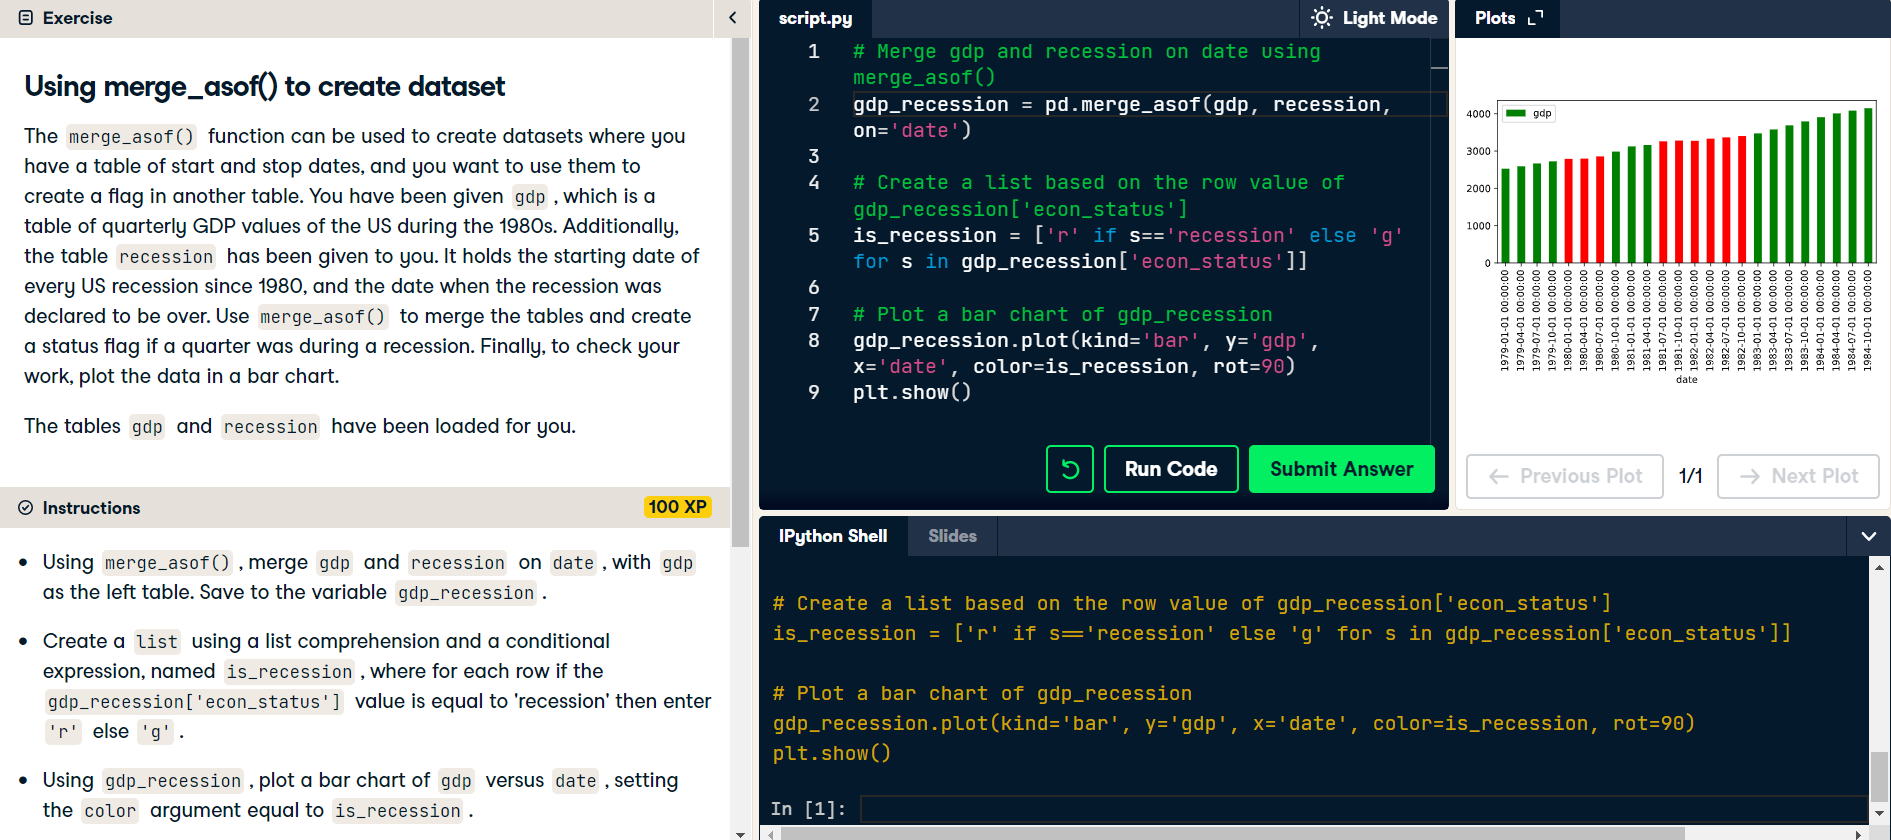

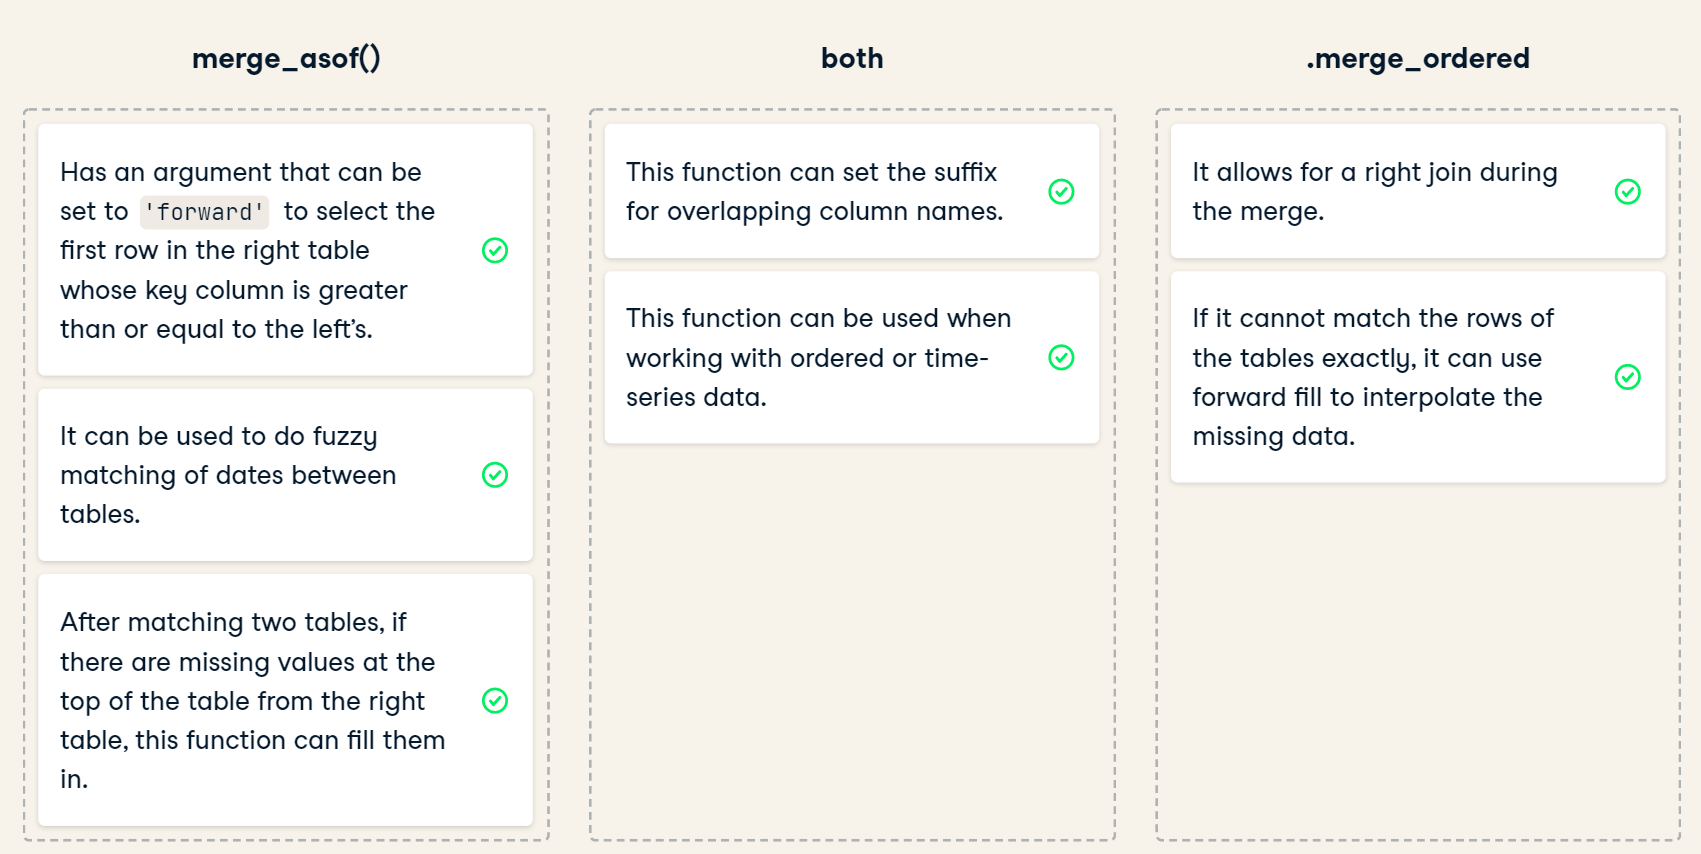

---
## .query()

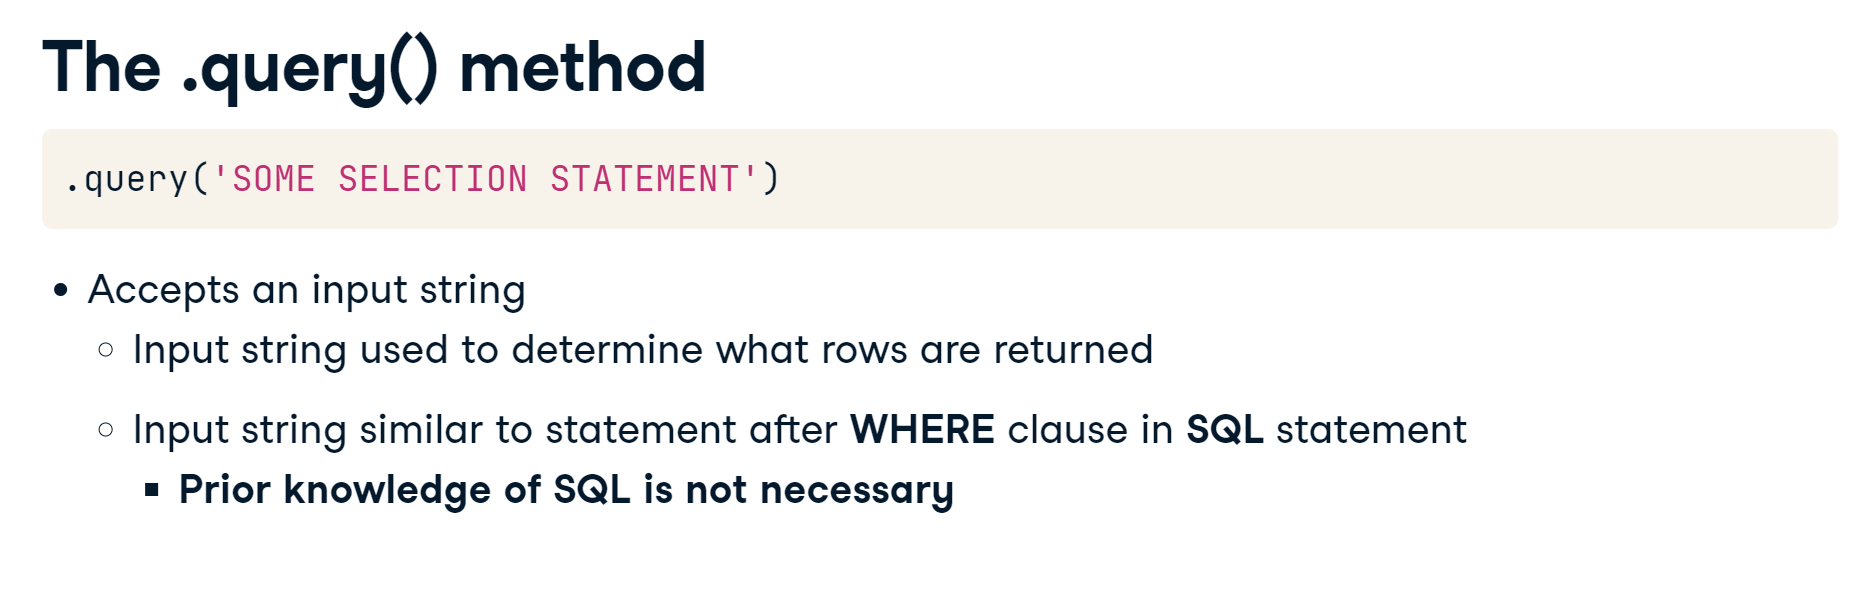

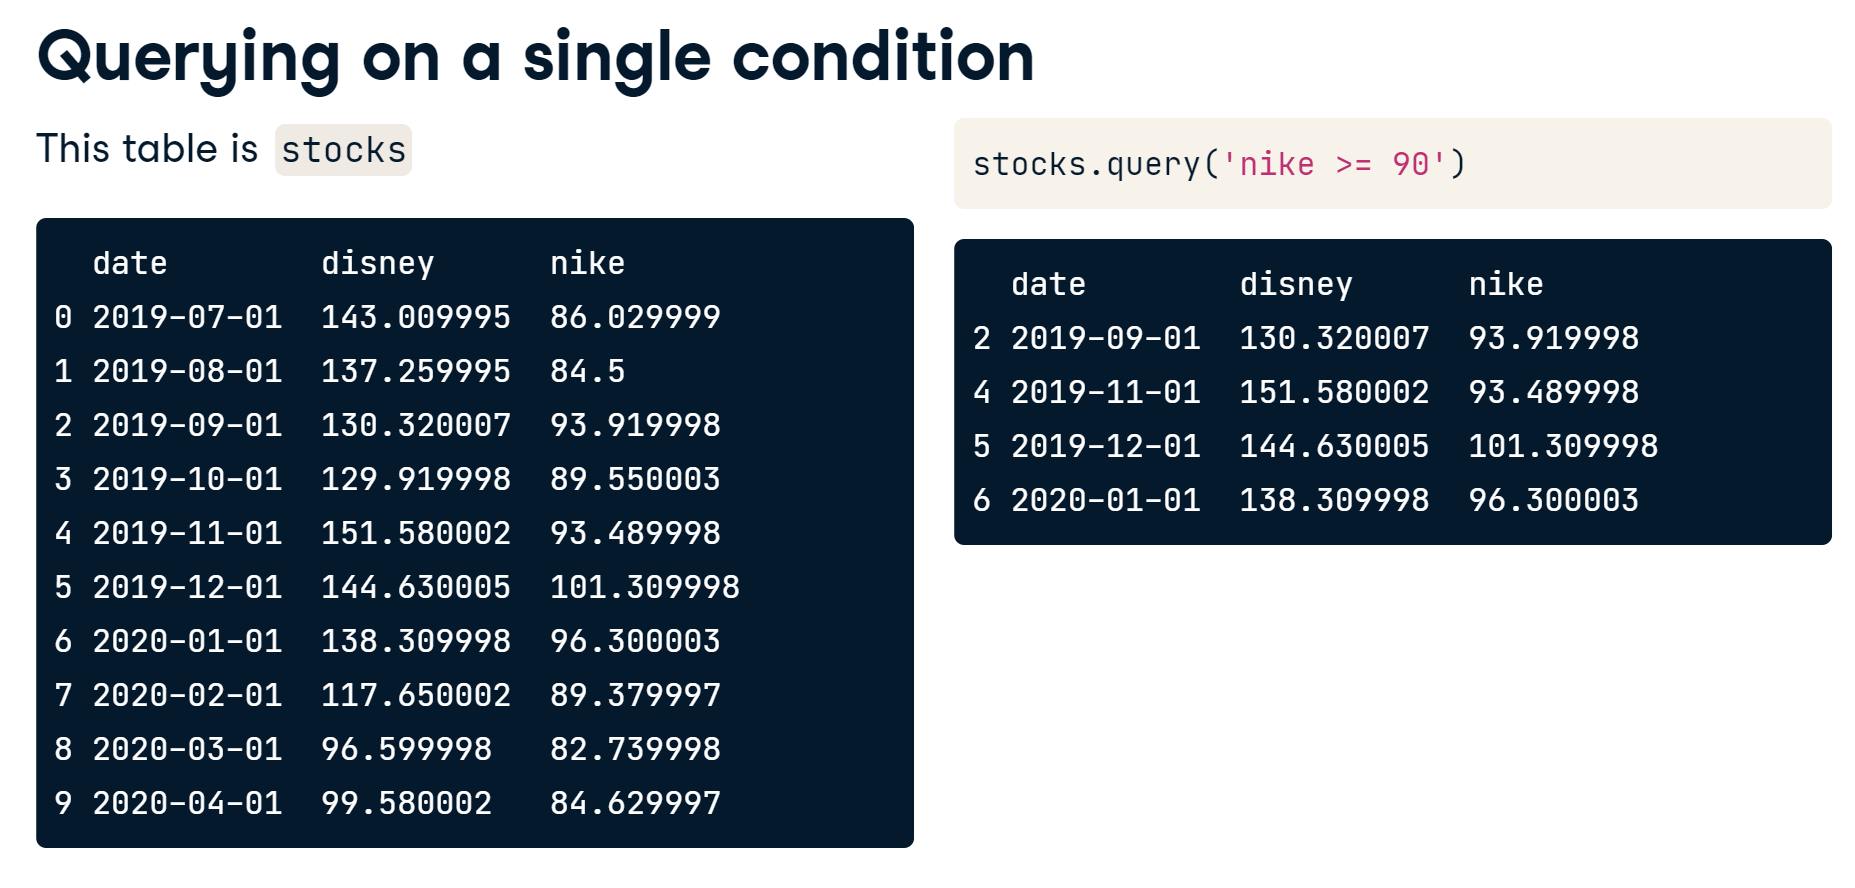

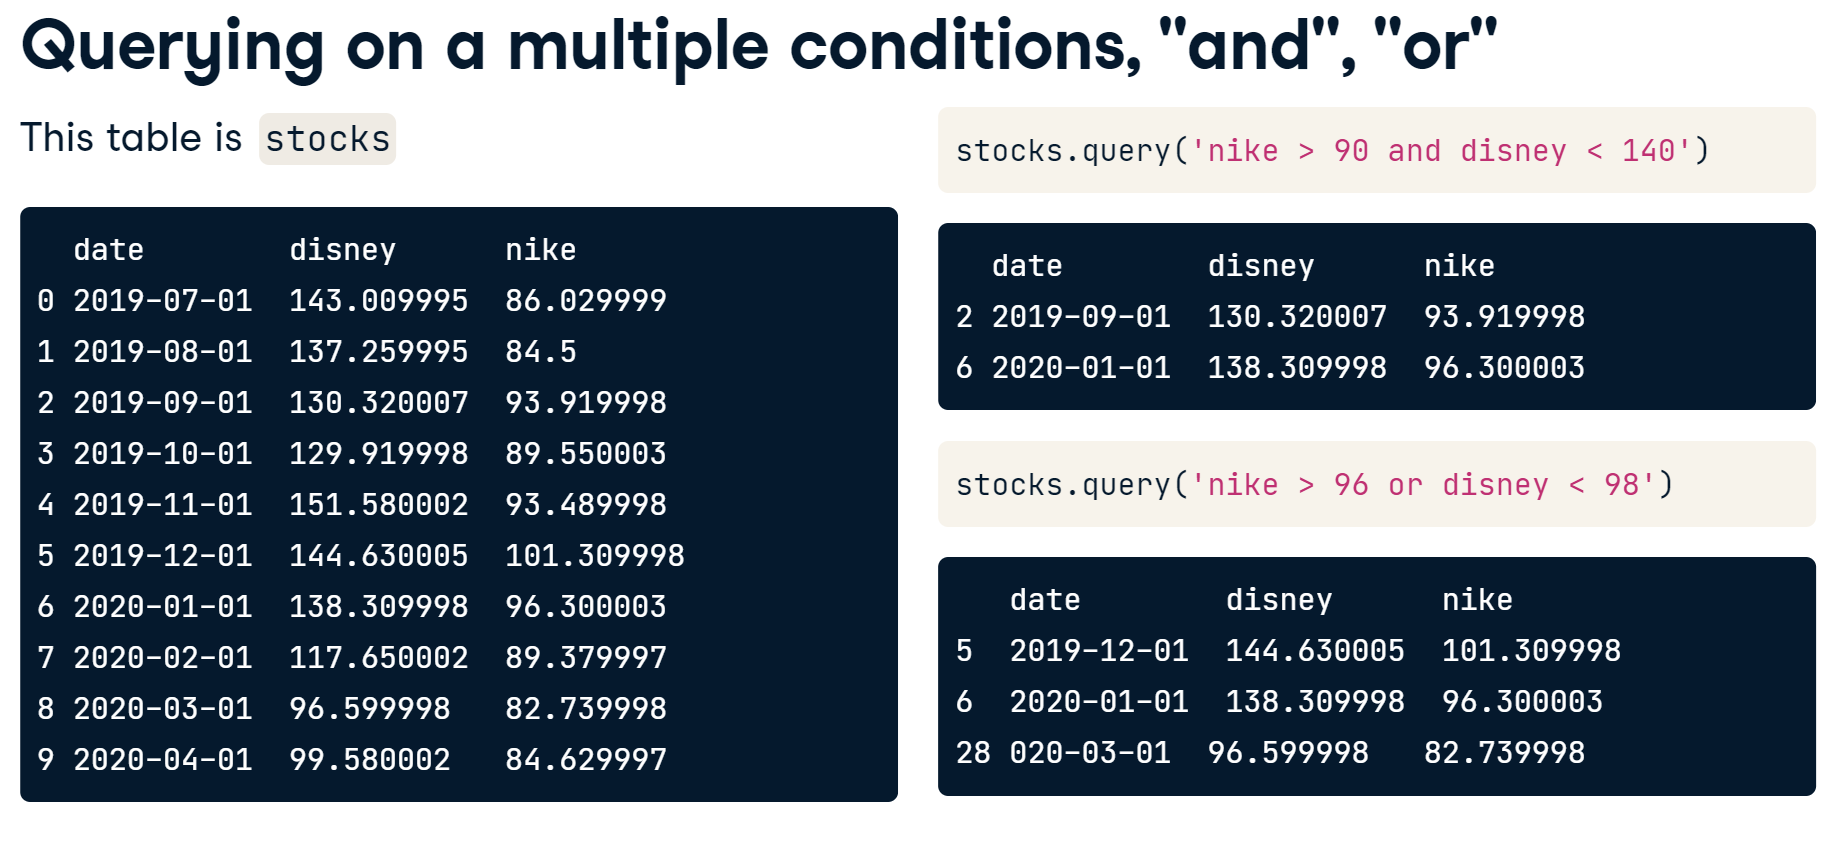

We can use query() method to select strings

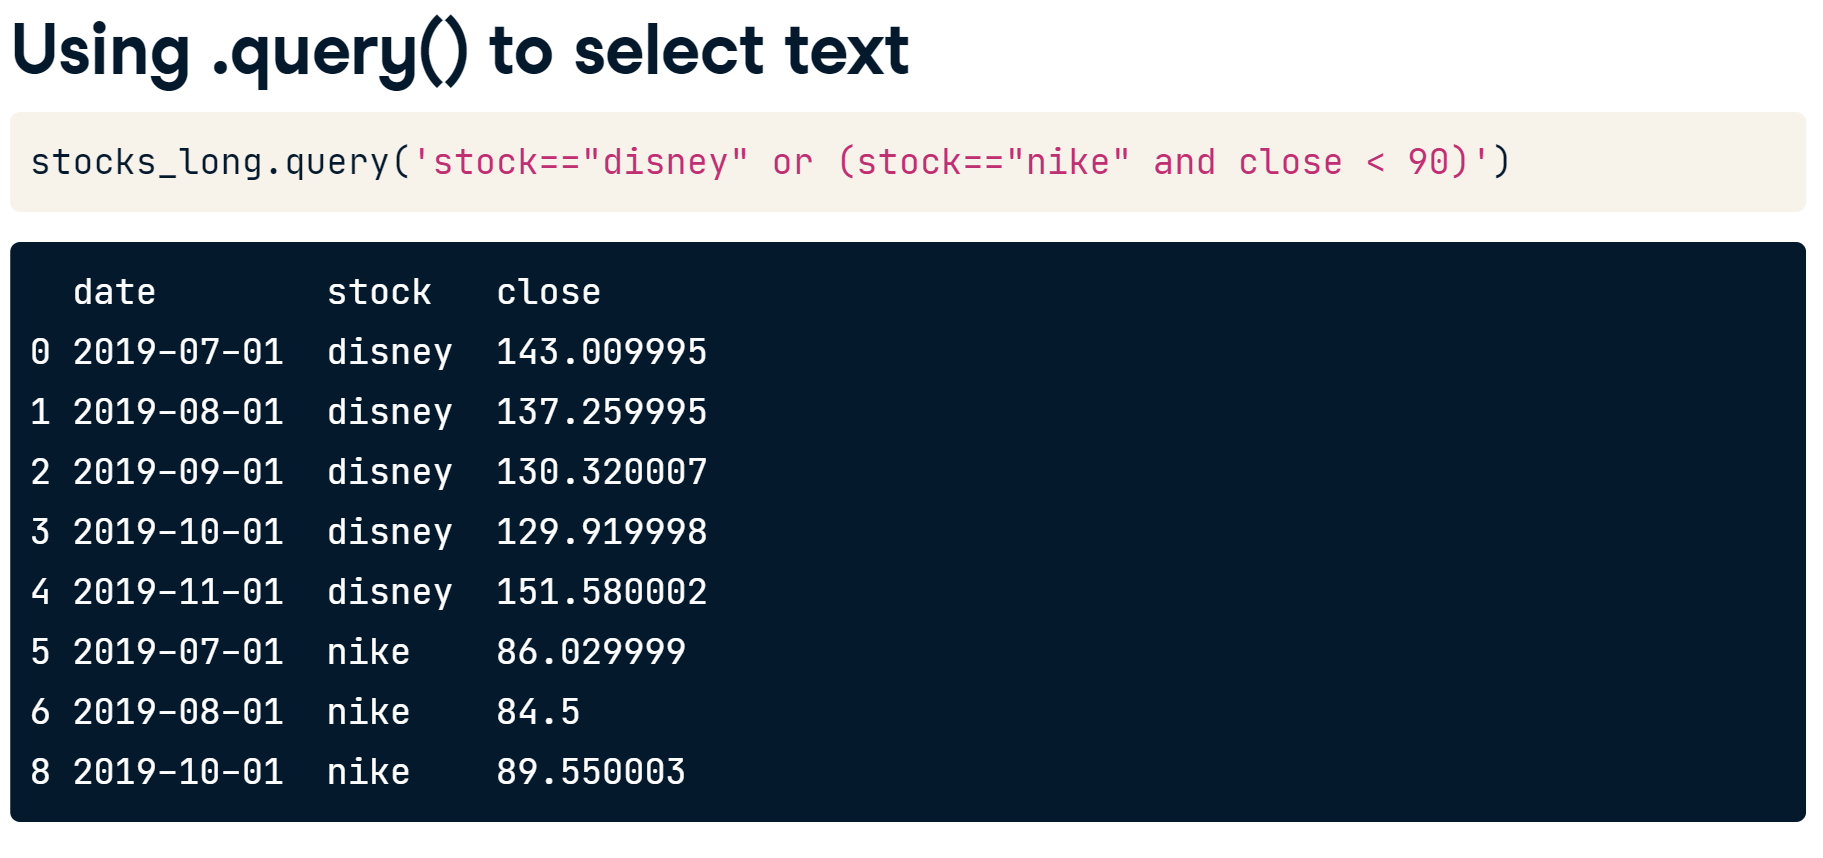


---
## .melt()

Useful to reshaping our table in more computer friendly format.

Wide data is easier to read by people, while long data is often more accessible to computer to work with.

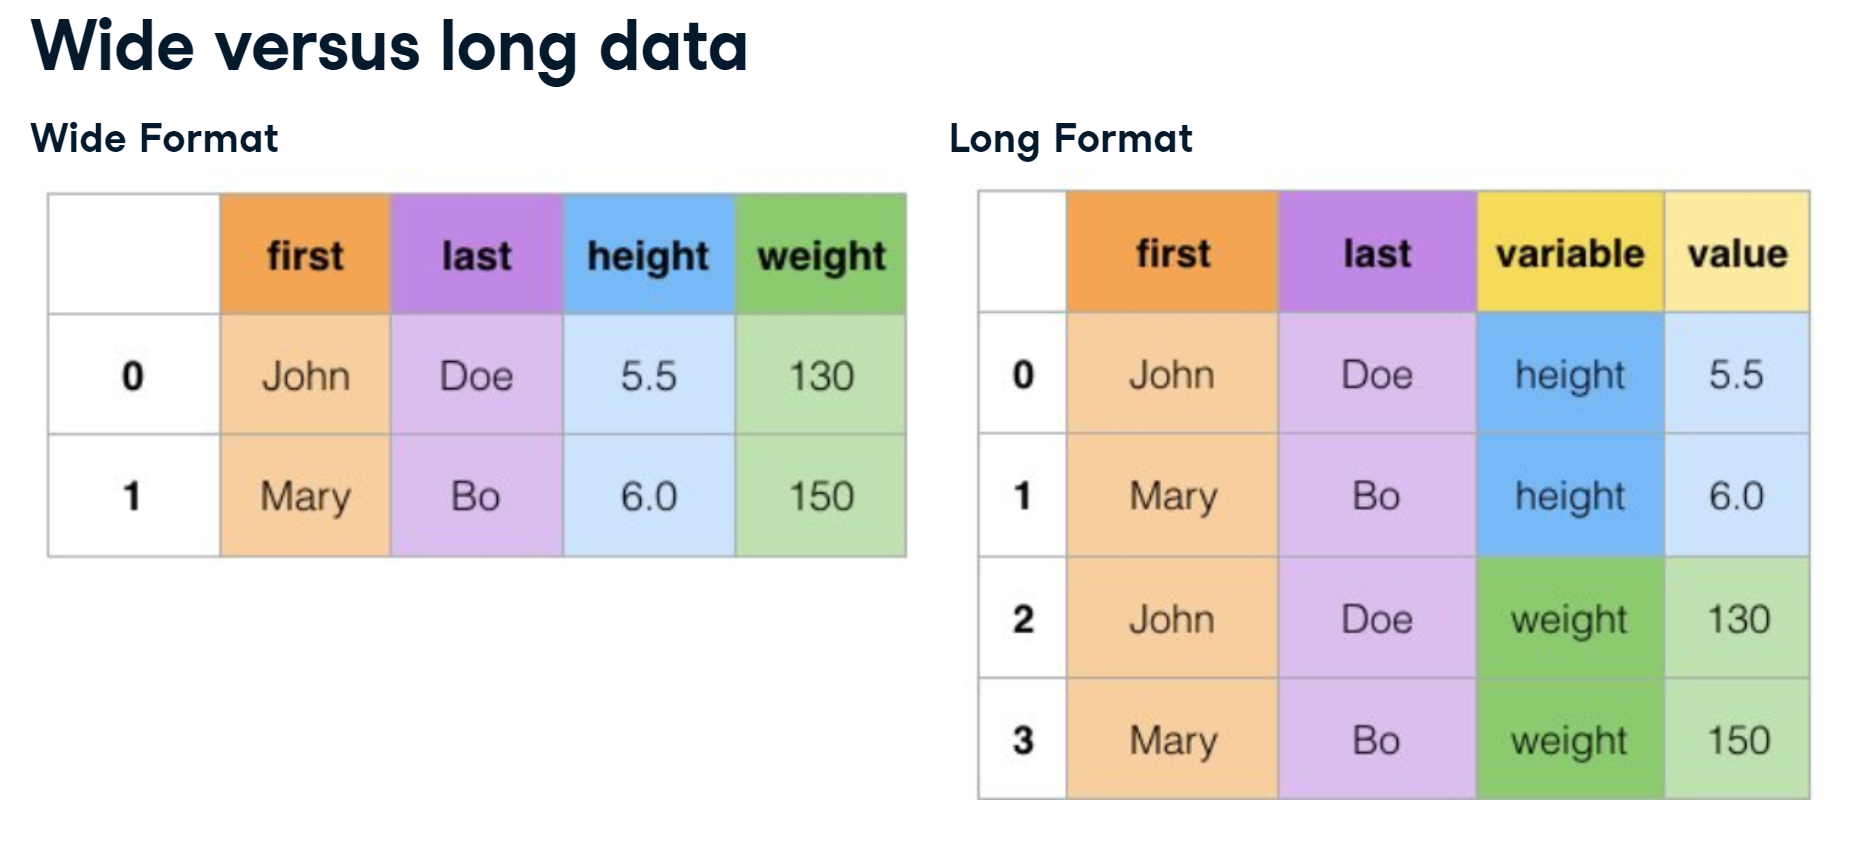

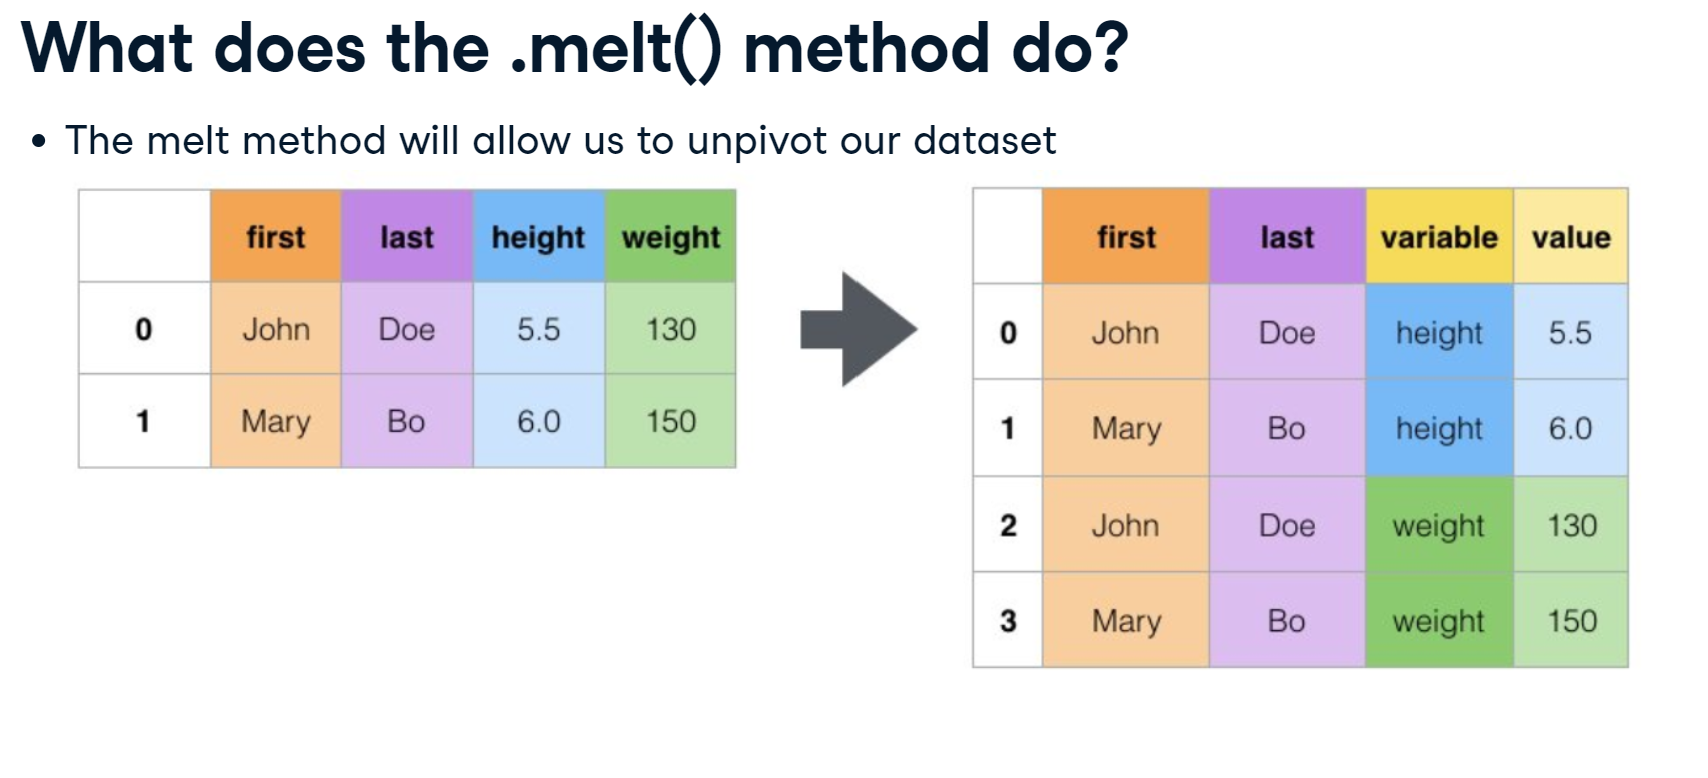

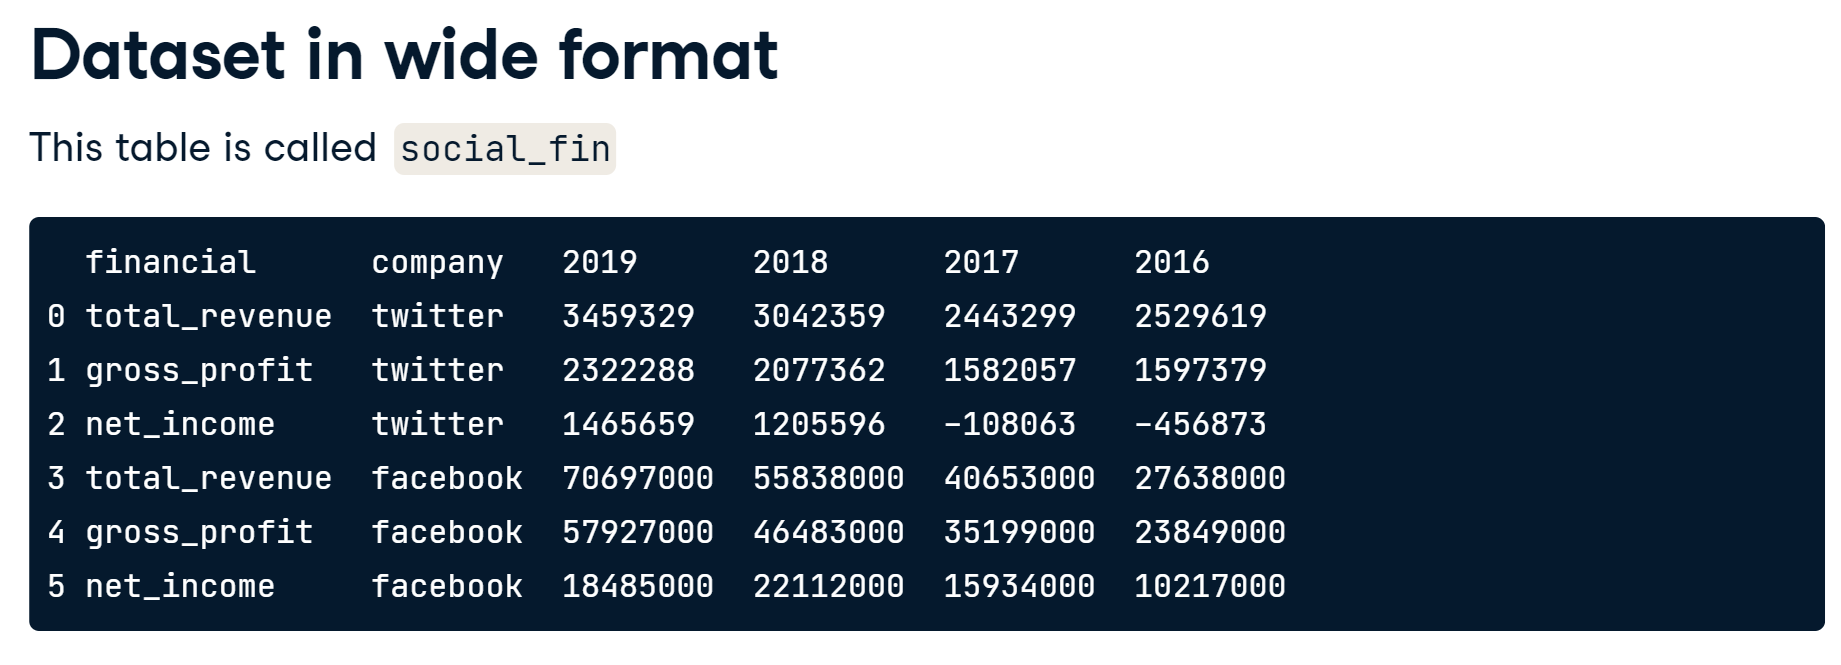

**id_vars**: this argument stands for identifier variables, these are those variables that remains intact in the wide format i.e. they are not unfolded/ unpivoted.

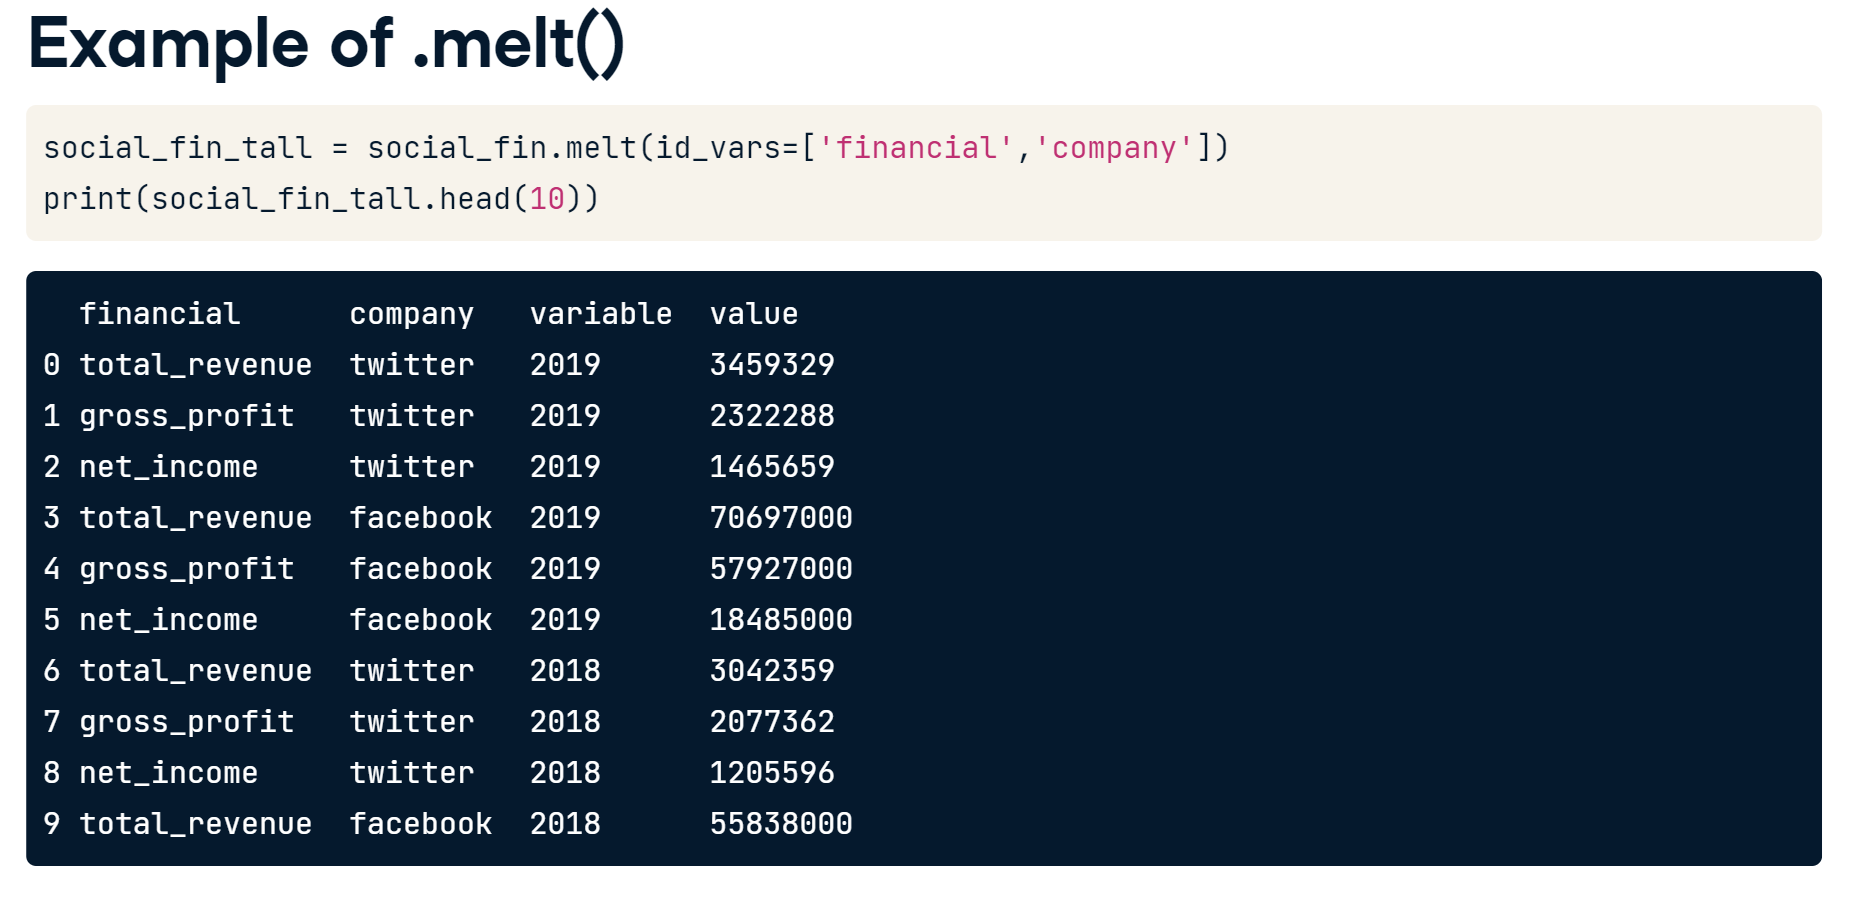

**value_vars**: this argument selects which columns are to be unpivoted into the resultant data, the columns not selected will the removed from the data. Also the order at which the columns names are mentioned is also considered while unpivoting the data.

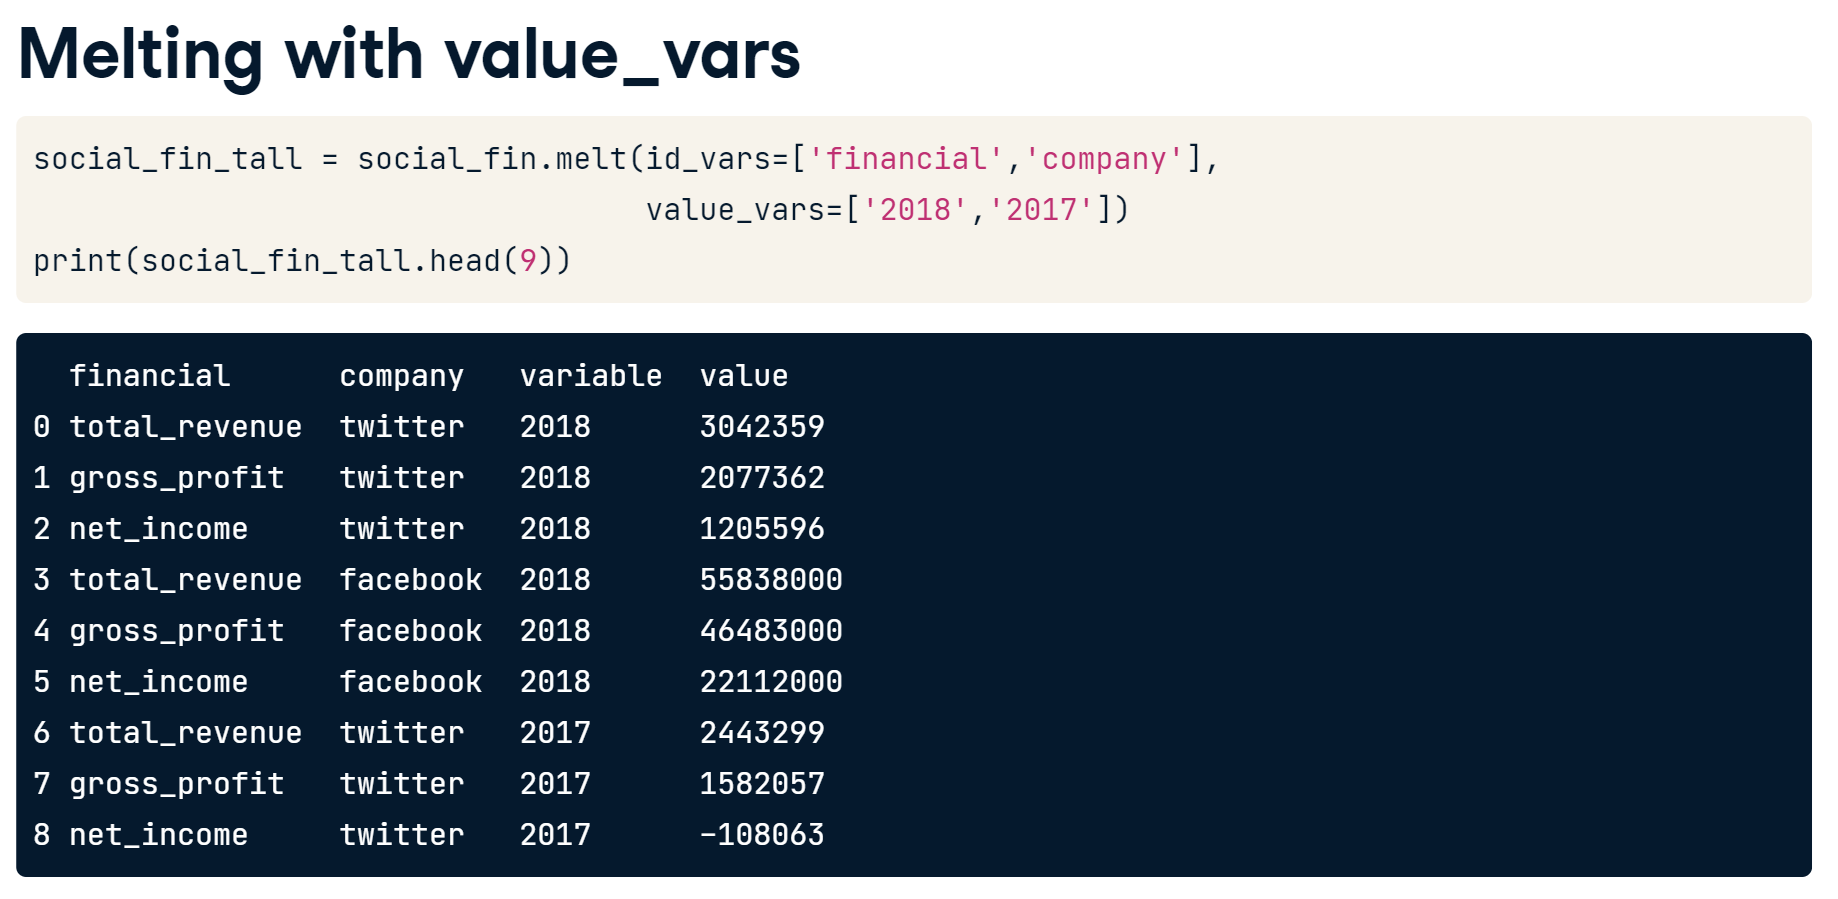

**var_name** and **value_name**: these arguments are bydefault set to `variable` and `value` respectively. But through these arguments we can simply change the column names in unpivoted resultant data.

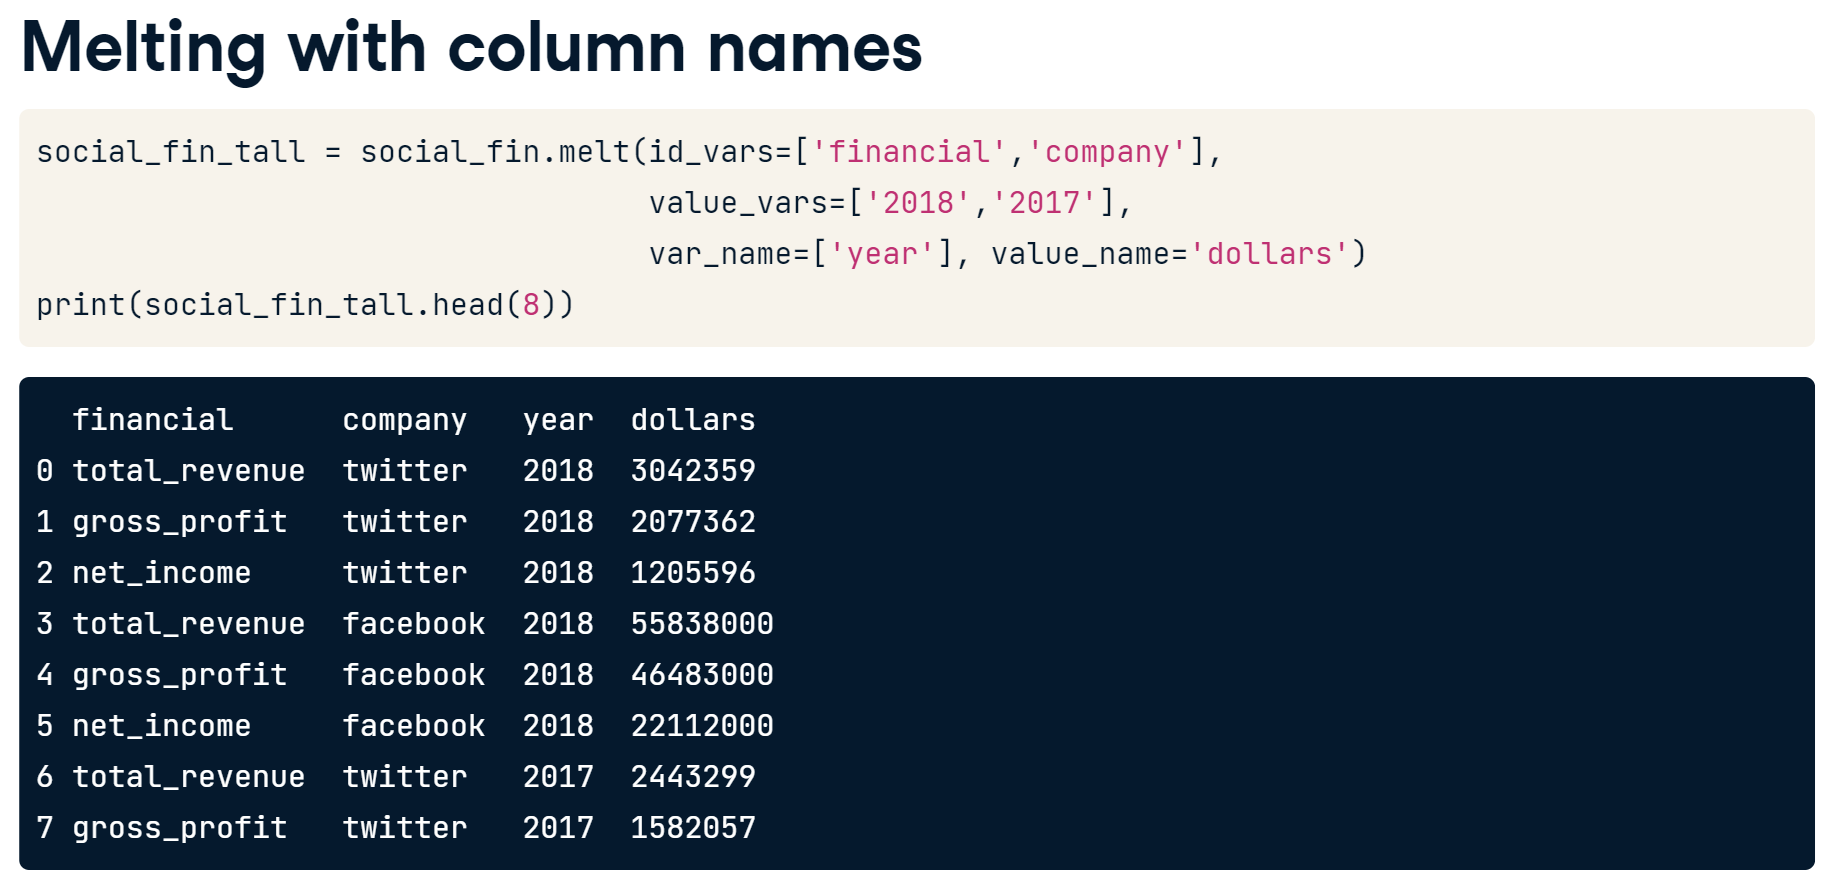



---
---